In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import matplotlib.font_manager
plt.rcParams['font.sans-serif'] = ['SimHei']  # Настройка шрифтов для Matplotlib замена 'SimHei' на название установленного шрифта
plt.rcParams['axes.unicode_minus'] = False  # Для корректного отображения минуса  
from sklearn.preprocessing import OneHotEncoder, TargetEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import DBSCAN

In [10]:
# Загрузка датасетов
data = pd.read_csv('data.csv')
data_by_artist = pd.read_csv('data_by_artist.csv')
data_by_genres = pd.read_csv('data_by_genres.csv')
data_by_year = pd.read_csv('data_by_year.csv')
data_w_genres = pd.read_csv('data_w_genres.csv')

In [13]:
data.head(10)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
5,0.1960,1921,0.579,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.697,395076,0.346,0,4pyw9DVHGStUre4J6hPngr,0.168000,2,0.130,-12.506,1,Gati Mardika,6,1921,0.0700,119.824
6,0.4060,1921,0.996,['John McCormack'],0.518,159507,0.203,0,5uNZnElqOS3W4fRmRYPk4T,0.000000,0,0.115,-10.589,1,The Wearing of the Green,4,1921,0.0615,66.221
7,0.0731,1921,0.993,['Sergei Rachmaninoff'],0.389,218773,0.088,0,02GDntOXexBFUvSgaXLPkd,0.527000,1,0.363,-21.091,0,"Morceaux de fantaisie, Op. 3: No. 2, Prélude i...",2,1921,0.0456,92.867
8,0.7210,1921,0.996,['Ignacio Corsini'],0.485,161520,0.130,0,05xDjWH9ub67nJJk82yfGf,0.151000,5,0.104,-21.508,0,La Mañanita - Remasterizado,0,1921-03-20,0.0483,64.678
9,0.7710,1921,0.982,['Fortugé'],0.684,196560,0.257,0,08zfJvRLp7pjAb94MA9JmF,0.000000,8,0.504,-16.415,1,Il Etait Syndiqué,0,1921,0.3990,109.378


In [15]:
# Проверка уникальности key в каждом датасете
print(f"data['key'].is_unique: {data['key'].is_unique}")
print(f"data_by_artist['key'].is_unique: {data_by_artist['key'].is_unique}")
print(f"data_by_genres['key'].is_unique: {data_by_genres['key'].is_unique}")
print(f"data_by_year['key'].is_unique: {data_by_year['key'].is_unique}")
print(f"data_w_genres['key'].is_unique: {data_w_genres['key'].is_unique}")

data['key'].is_unique: False
data_by_artist['key'].is_unique: False
data_by_genres['key'].is_unique: False
data_by_year['key'].is_unique: False
data_w_genres['key'].is_unique: False


In [17]:
print("Столбцы data:")
for i, col in enumerate(data.columns):
    print(f"{i+1}. {col}")

Столбцы data:
1. valence
2. year
3. acousticness
4. artists
5. danceability
6. duration_ms
7. energy
8. explicit
9. id
10. instrumentalness
11. key
12. liveness
13. loudness
14. mode
15. name
16. popularity
17. release_date
18. speechiness
19. tempo


In [19]:
# Создаем список всех DataFrame
dataframes = {
    "data": data,
    "data_by_artist": data_by_artist,
    "data_by_genres": data_by_genres,
    "data_by_year": data_by_year,
    "data_w_genres": data_w_genres
}

In [21]:
# Находим все уникальные названия столбцов
all_columns = set()
for df_name, df in dataframes.items():
    all_columns.update(set(df.columns))  # Преобразуем df.columns в множество

In [23]:

# Находим столбцы, которые встречаются во всех DataFrame
common_columns = set.intersection(*[set(df.columns) for df in dataframes.values()])


In [25]:
print("Общие столбцы во всех DataFrame:")
print(common_columns)


Общие столбцы во всех DataFrame:
{'speechiness', 'energy', 'popularity', 'danceability', 'valence', 'loudness', 'tempo', 'liveness', 'acousticness', 'instrumentalness', 'key', 'mode', 'duration_ms'}


In [27]:
print("--- Проверка и преобразование типов данных ---")
# Проверяем и преобразуем типы данных
for column in common_columns:
    # Определяем тип данных столбца в первом DataFrame
    first_df_name = next(iter(dataframes))  # Получаем имя первого DataFrame
    expected_type = dataframes[first_df_name][column].dtype

    print(f"Проверка столбца '{column}': Ожидаемый тип данных: {expected_type}")

    # Проходим по остальным DataFrame и преобразуем типы данных, если необходимо
    for df_name, df in dataframes.items():
        if column in df.columns:
            if df[column].dtype != expected_type:
                try:
                    print(f"  Преобразование столбца '{column}' в DataFrame '{df_name}' из {df[column].dtype} в {expected_type}")
                    dataframes[df_name][column] = df[column].astype(expected_type)
                except ValueError as e:
                    print(f"  Ошибка при преобразовании столбца '{column}' в DataFrame '{df_name}': {e}")
        else:
            print(f"  Столбец '{column}' отсутствует в DataFrame '{df_name}'")

--- Проверка и преобразование типов данных ---
Проверка столбца 'speechiness': Ожидаемый тип данных: float64
Проверка столбца 'energy': Ожидаемый тип данных: float64
Проверка столбца 'popularity': Ожидаемый тип данных: int64
  Преобразование столбца 'popularity' в DataFrame 'data_by_artist' из float64 в int64
  Преобразование столбца 'popularity' в DataFrame 'data_by_genres' из float64 в int64
  Преобразование столбца 'popularity' в DataFrame 'data_by_year' из float64 в int64
  Преобразование столбца 'popularity' в DataFrame 'data_w_genres' из float64 в int64
Проверка столбца 'danceability': Ожидаемый тип данных: float64
Проверка столбца 'valence': Ожидаемый тип данных: float64
Проверка столбца 'loudness': Ожидаемый тип данных: float64
Проверка столбца 'tempo': Ожидаемый тип данных: float64
Проверка столбца 'liveness': Ожидаемый тип данных: float64
Проверка столбца 'acousticness': Ожидаемый тип данных: float64
Проверка столбца 'instrumentalness': Ожидаемый тип данных: float64
Проверка 

In [29]:
print("\n--- Обработка пропущенных значений ---")
# Обрабатываем пропущенные значения в общих столбцах
for column in common_columns:
    for df_name, df in dataframes.items():
        if column in df.columns:
            # Заполняем пропущенные значения (замените 0 на подходящее значение)
            if df[column].isnull().any():
                print(f"  Заполнение пропущенных значений в столбце '{column}' в DataFrame '{df_name}' нулями")
                dataframes[df_name][column] = df[column].fillna(0) # Замените 0 на df[column].mean() или другое значение

            # Проверяем, остались ли пропущенные значения
            if df[column].isnull().any():
                print(f"  ВНИМАНИЕ: После заполнения остались пропущенные значения в столбце '{column}' в DataFrame '{df_name}'")



--- Обработка пропущенных значений ---


In [31]:
print("\n--- Удаление дубликатов ---")
# Удаляем дублирующиеся строки на основе общих столбцов
for df_name, df in dataframes.items():
    # Считаем количество дубликатов перед удалением
    duplicates_count = df.duplicated(subset=list(common_columns)).sum()

    # Удаляем дубликаты
    dataframes[df_name] = df.drop_duplicates(subset=list(common_columns))

    # Проверяем, были ли удалены дубликаты
    if duplicates_count > 0:
        print(f"  Удалено {duplicates_count} дублирующихся строк из DataFrame '{df_name}' на основе общих столбцов")
    else:
        print(f"  В DataFrame '{df_name}' не найдено дублирующихся строк на основе общих столбцов")

print("\n--- Все DataFrame обработаны ---")


--- Удаление дубликатов ---
  Удалено 1132 дублирующихся строк из DataFrame 'data' на основе общих столбцов
  Удалено 2260 дублирующихся строк из DataFrame 'data_by_artist' на основе общих столбцов
  Удалено 93 дублирующихся строк из DataFrame 'data_by_genres' на основе общих столбцов
  В DataFrame 'data_by_year' не найдено дублирующихся строк на основе общих столбцов
  Удалено 2261 дублирующихся строк из DataFrame 'data_w_genres' на основе общих столбцов

--- Все DataFrame обработаны ---


In [33]:
# объединили эти датасеты в один большой DataFrame, который назвали main_df
main_df = data.copy()

# Список DataFrame, которые нужно объединить с основным
dfs_to_merge = {
    "data_by_artist": data_by_artist,
    "data_by_genres": data_by_genres,
    "data_by_year": data_by_year,
    "data_w_genres": data_w_genres
}

# Определяем общие столбцы 
common_columns = {'valence', 'energy', 'instrumentalness', 'loudness', 'danceability', 'mode', 'key', 'acousticness', 'tempo', 'popularity', 'duration_ms', 'liveness', 'speechiness'}

# Объединяем каждый DataFrame с основным
for df_name, df in dfs_to_merge.items():
    # Определяем уникальные столбцы для текущего DataFrame
    unique_columns = [col for col in df.columns if col not in common_columns]

    # Создаем суффиксы для уникальных столбцов
    suffixes = ('', f'_{df_name}')

    # Выполняем объединение по общим столбцам
    main_df = pd.merge(main_df, df[list(common_columns) + unique_columns], on=list(common_columns), how='left', suffixes=suffixes)

# Выводим информацию о результате
main_df.info()
main_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177753 entries, 0 to 177752
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   valence                 177753 non-null  float64
 1   year                    177753 non-null  int64  
 2   acousticness            177753 non-null  float64
 3   artists                 177753 non-null  object 
 4   danceability            177753 non-null  float64
 5   duration_ms             177753 non-null  int64  
 6   energy                  177753 non-null  float64
 7   explicit                177753 non-null  int64  
 8   id                      177753 non-null  object 
 9   instrumentalness        177753 non-null  float64
 10  key                     177753 non-null  int64  
 11  liveness                177753 non-null  float64
 12  loudness                177753 non-null  float64
 13  mode                    177753 non-null  int64  
 14  name                

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,release_date,speechiness,tempo,count,artists_data_by_artist,genres,year_data_by_year,genres_data_w_genres,artists_data_w_genres,count_data_w_genres
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,...,1921,0.0366,80.954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,...,1921,0.4150,60.936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,...,1921,0.0339,110.339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,...,1921,0.0354,100.109,2.0,Frank Parker,NaN,NaN,[],Frank Parker,2.0
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,...,1921,0.0380,101.665,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# Определяем количество не-пропущенных значений в каждой колонке
non_null_counts = main_df.count()
non_null_counts

valence                   177753
year                      177753
acousticness              177753
artists                   177753
danceability              177753
duration_ms               177753
energy                    177753
explicit                  177753
id                        177753
instrumentalness          177753
key                       177753
liveness                  177753
loudness                  177753
mode                      177753
name                      177753
popularity                177753
release_date              177753
speechiness               177753
tempo                     177753
count                      15021
artists_data_by_artist     15021
genres                      1014
year_data_by_year              0
genres_data_w_genres       18532
artists_data_w_genres      18532
count_data_w_genres        18532
dtype: int64

In [37]:
# Определяем колонки, которые нужно удалить
columns_to_drop = non_null_counts[non_null_counts != 177753].index

In [39]:
# Удаляем колонки
main_df_work = main_df.drop(columns=columns_to_drop)

In [41]:
print(main_df_work.head())  # Предполагается, что это ваш исходный датафрейм
print(main_df_work['id'].isna().sum())  # Количество NaN в столбце id

   valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz          0.878000   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8          0.000000   
2       500062   0.166         0  1o6I8BglA6ylDMrIELygv1          0.913000   
3       210000   0.309         0  3ftBPsC5vPBKxYSee08FDH      

In [43]:
main_df_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177753 entries, 0 to 177752
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           177753 non-null  float64
 1   year              177753 non-null  int64  
 2   acousticness      177753 non-null  float64
 3   artists           177753 non-null  object 
 4   danceability      177753 non-null  float64
 5   duration_ms       177753 non-null  int64  
 6   energy            177753 non-null  float64
 7   explicit          177753 non-null  int64  
 8   id                177753 non-null  object 
 9   instrumentalness  177753 non-null  float64
 10  key               177753 non-null  int64  
 11  liveness          177753 non-null  float64
 12  loudness          177753 non-null  float64
 13  mode              177753 non-null  int64  
 14  name              177753 non-null  object 
 15  popularity        177753 non-null  int64  
 16  release_date      17

In [45]:
main_df_work.describe().T

,count,mean,std,min,25%,50%,75%,max
valence,177753.0,0.525266,0.264283,0.0,0.3120,0.536000,0.7440,1.000
year,177753.0,1977.176408,26.019540,1921.0,1956.0000,1978.000000,1999.0000,2020.000
acousticness,177753.0,0.505844,0.376741,0.0,0.1030,0.526000,0.8990,0.996
danceability,177753.0,0.536295,0.178193,0.0,0.4130,0.547000,0.6690,0.988
duration_ms,177753.0,232395.455227,128744.449283,5108.0,170295.0000,207933.000000,263933.0000,5403500.000
energy,177753.0,0.481013,0.268457,0.0,0.2520,0.470000,0.7030,1.000
explicit,177753.0,0.086052,0.280442,0.0,0.0000,0.000000,0.0000,1.000
instrumentalness,177753.0,0.169034,0.314879,0.0,0.0000,0.000219,0.1090,1.000
key,177753.0,5.175508,3.518762,0.0,2.0000,5.000000,8.0000,11.000
liveness,177753.0,0.206071,0.174997,0.0,0.0988,0.136000,0.2620,1.000


In [47]:
# Определяем числовые столбцы
numerical_cols = main_df_work.select_dtypes(include=['number']).columns

In [49]:
numerical_cols

Index(['valence', 'year', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'popularity', 'speechiness', 'tempo'],
      dtype='object')

In [51]:
# Создаем новый DataFrame только с числовыми столбцами
numerical_df = main_df_work[numerical_cols].copy()

In [53]:
# Рассчитываем описательные статистики для числовых столбцов
descriptive_stats = numerical_df.describe()
descriptive_stats.T

,count,mean,std,min,25%,50%,75%,max
valence,177753.0,0.525266,0.264283,0.0,0.3120,0.536000,0.7440,1.000
year,177753.0,1977.176408,26.019540,1921.0,1956.0000,1978.000000,1999.0000,2020.000
acousticness,177753.0,0.505844,0.376741,0.0,0.1030,0.526000,0.8990,0.996
danceability,177753.0,0.536295,0.178193,0.0,0.4130,0.547000,0.6690,0.988
duration_ms,177753.0,232395.455227,128744.449283,5108.0,170295.0000,207933.000000,263933.0000,5403500.000
energy,177753.0,0.481013,0.268457,0.0,0.2520,0.470000,0.7030,1.000
explicit,177753.0,0.086052,0.280442,0.0,0.0000,0.000000,0.0000,1.000
instrumentalness,177753.0,0.169034,0.314879,0.0,0.0000,0.000219,0.1090,1.000
key,177753.0,5.175508,3.518762,0.0,2.0000,5.000000,8.0000,11.000
liveness,177753.0,0.206071,0.174997,0.0,0.0988,0.136000,0.2620,1.000


In [55]:

# Индивидуальный расчет статистик для каждого столбца
print("\nИндивидуальные статистики для каждого столбца:")
for col in numerical_cols:
    print(f"\nСтолбец: {col}")
    print(f"  Среднее: {numerical_df[col].mean()}")
    print(f"  Медиана: {numerical_df[col].median()}")
    print(f"  Стандартное отклонение: {numerical_df[col].std()}")
    print(f"  Минимум: {numerical_df[col].min()}")
    print(f"  Максимум: {numerical_df[col].max()}")


Индивидуальные статистики для каждого столбца:

Столбец: valence
  Среднее: 0.5252662135271979
  Медиана: 0.536
  Стандартное отклонение: 0.2642833280971171
  Минимум: 0.0
  Максимум: 1.0

Столбец: year
  Среднее: 1977.1764077118248
  Медиана: 1978.0
  Стандартное отклонение: 26.019540352802753
  Минимум: 1921
  Максимум: 2020

Столбец: acousticness
  Среднее: 0.5058441115166552
  Медиана: 0.526
  Стандартное отклонение: 0.3767410643202081
  Минимум: 0.0
  Максимум: 0.996

Столбец: danceability
  Среднее: 0.5362953075334874
  Медиана: 0.547
  Стандартное отклонение: 0.17819325013519352
  Минимум: 0.0
  Максимум: 0.988

Столбец: duration_ms
  Среднее: 232395.4552271973
  Медиана: 207933.0
  Стандартное отклонение: 128744.44928326021
  Минимум: 5108
  Максимум: 5403500

Столбец: energy
  Среднее: 0.48101253226162144
  Медиана: 0.47
  Стандартное отклонение: 0.2684571635925208
  Минимум: 0.0
  Максимум: 1.0

Столбец: explicit
  Среднее: 0.08605199349659359
  Медиана: 0.0
  Стандартное от

In [57]:
# Настройка шрифтов для Matplotlib
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']  # Указываем DejaVu Sans
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12  # Увеличиваем размер шрифта

In [59]:
# Рассчитываем корреляционную матрицу
correlation_matrix = numerical_df.corr()

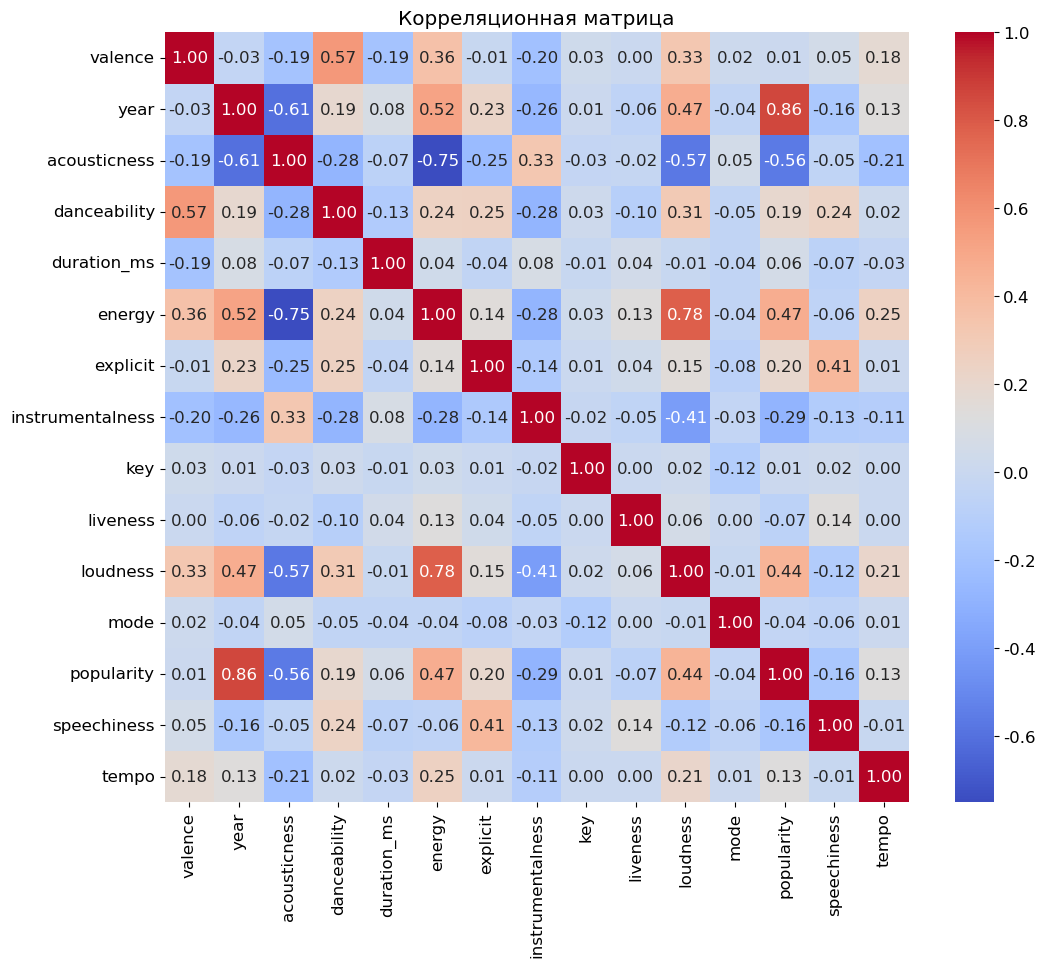

In [61]:
# Визуализируем корреляционную матрицу (тепловая карта)
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()

In [63]:
# Выводим значения корреляции для конкретных пар признаков
print("\nКорреляция между valence и energy:", numerical_df['valence'].corr(numerical_df['energy']))
print("Корреляция между danceability и energy:", numerical_df['danceability'].corr(numerical_df['energy']))
print("Корреляция между loudness и energy:", numerical_df['loudness'].corr(numerical_df['energy']))



Корреляция между valence и energy: 0.3607434578877739
Корреляция между danceability и energy: 0.24190851932639715
Корреляция между loudness и energy: 0.7842085065046939


In [65]:
# Выводим пары признаков с высокой корреляцией
print("\nПары признаков с высокой корреляцией (abs(corr) > 0.7):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            print(f"{correlation_matrix.columns[i]} и {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.2f}")


Пары признаков с высокой корреляцией (abs(corr) > 0.7):
year и popularity: 0.86
acousticness и energy: -0.75
energy и loudness: 0.78


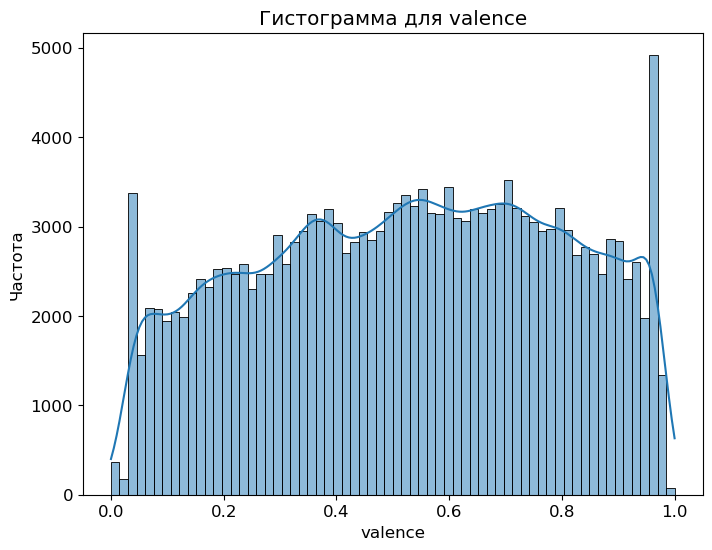

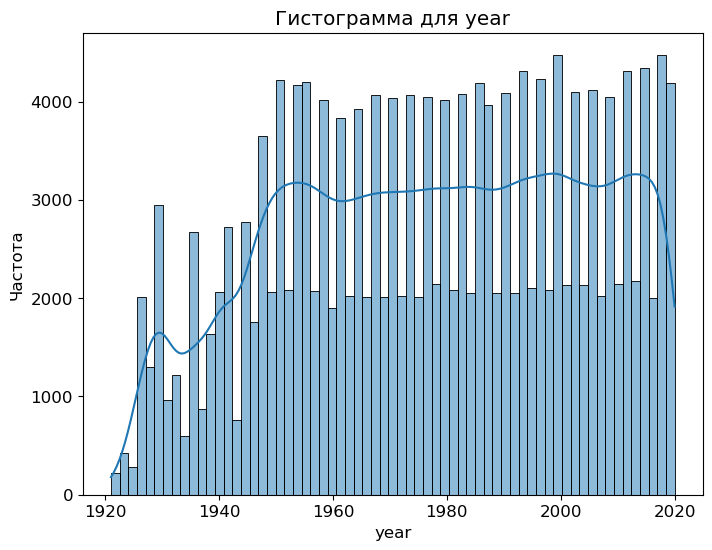

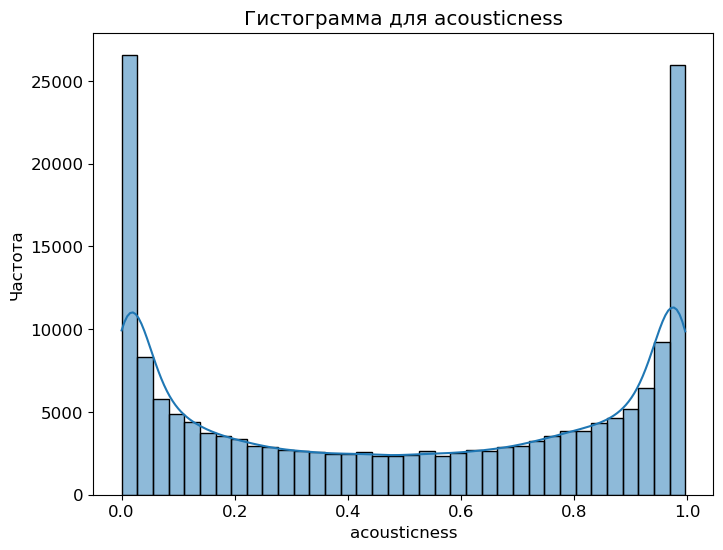

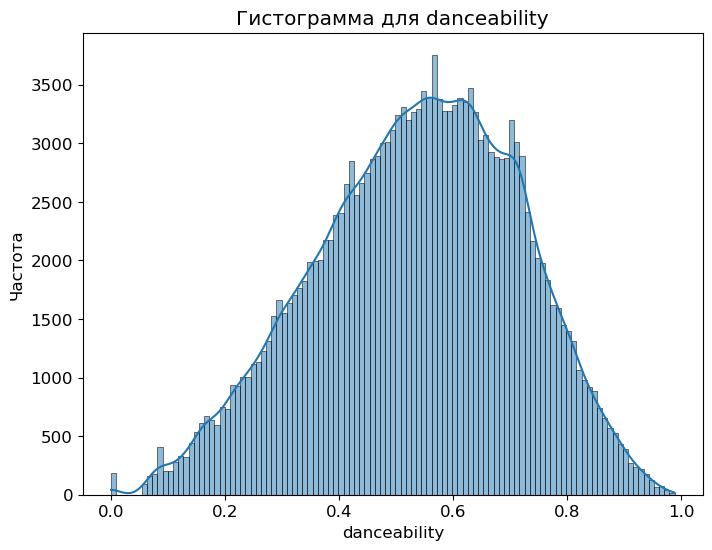

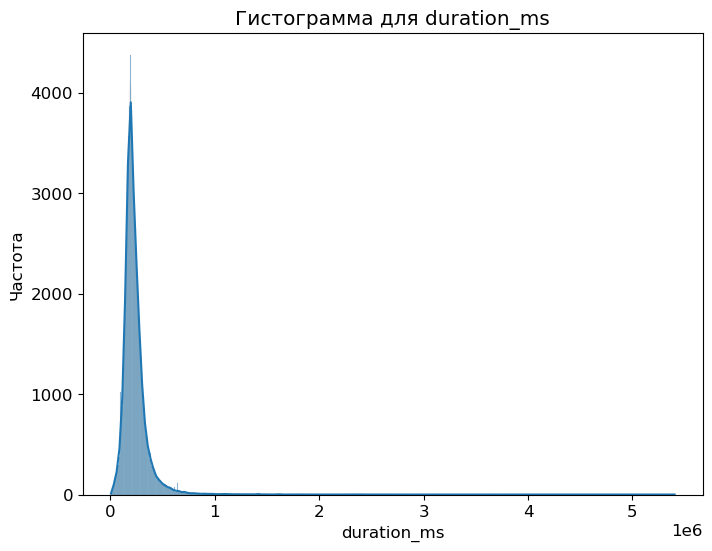

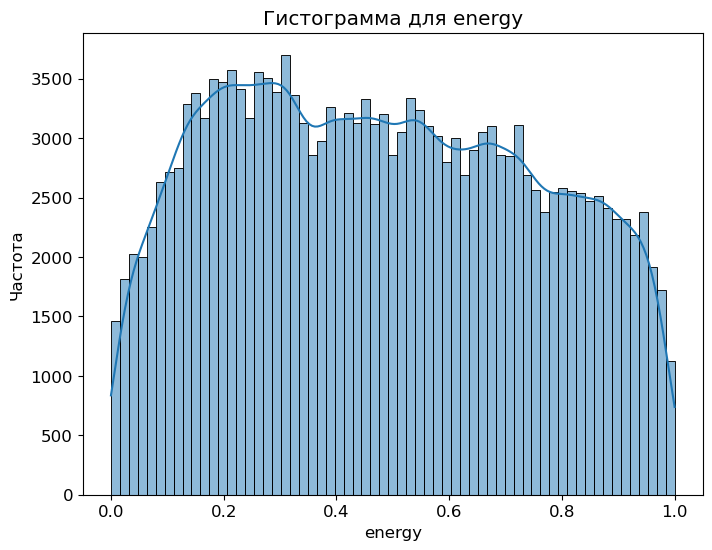

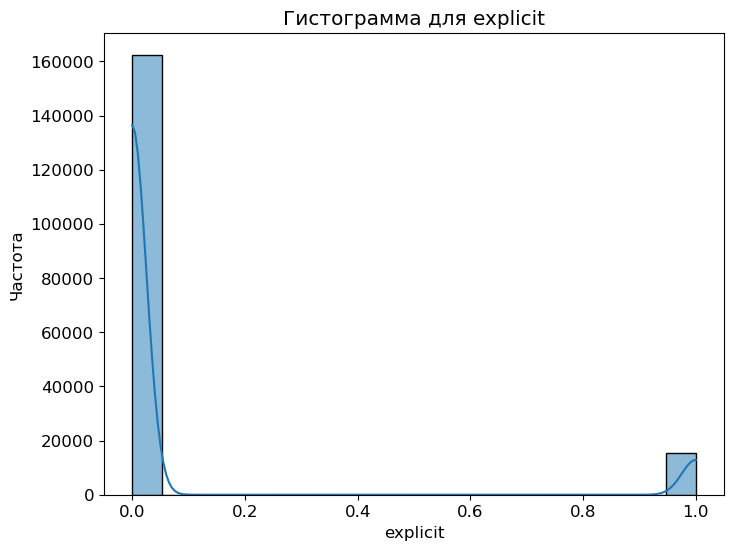

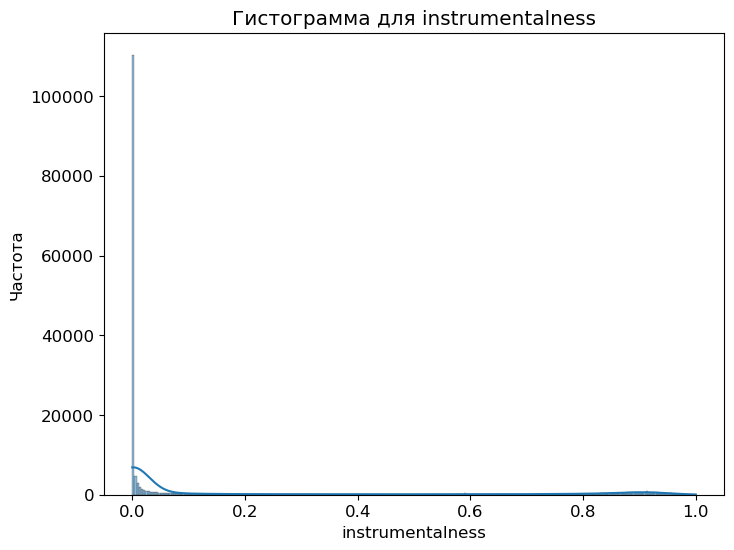

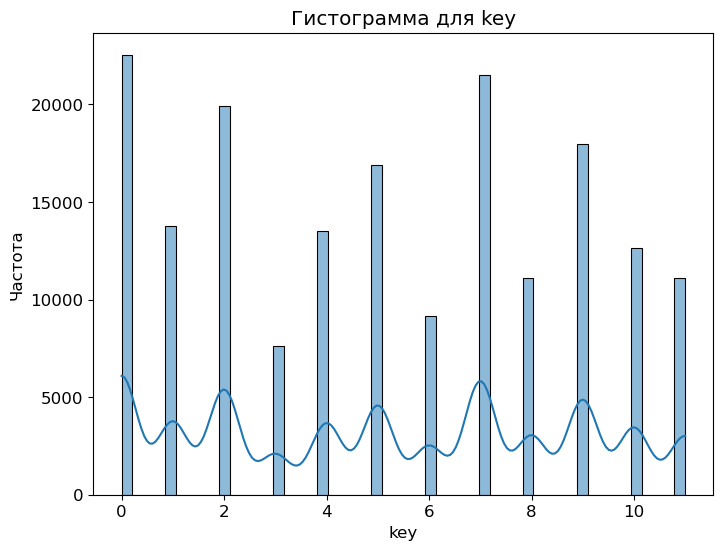

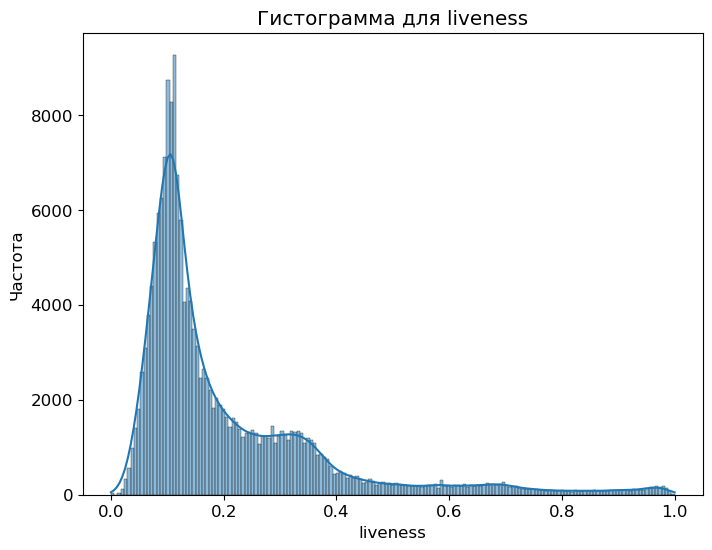

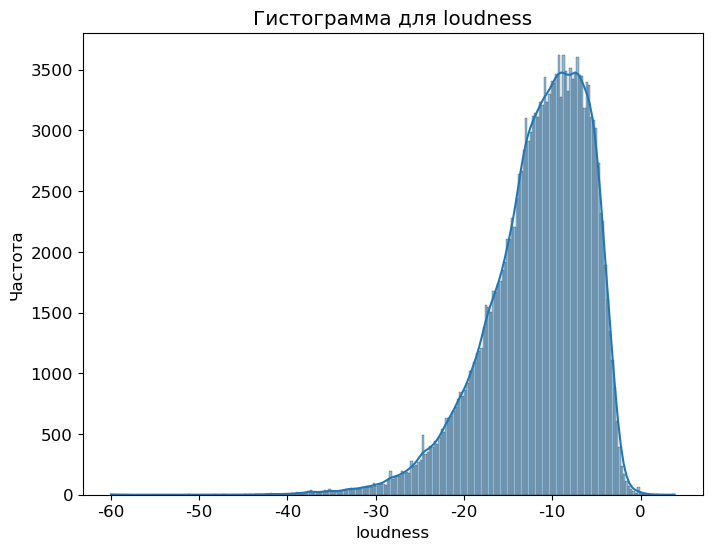

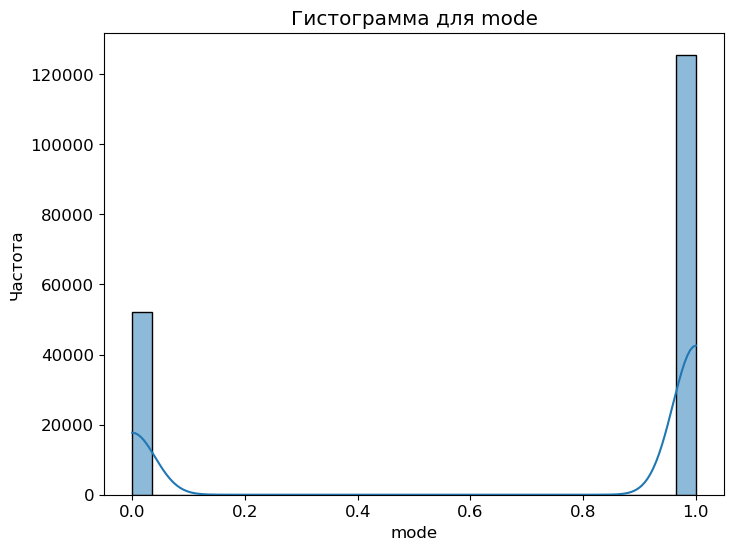

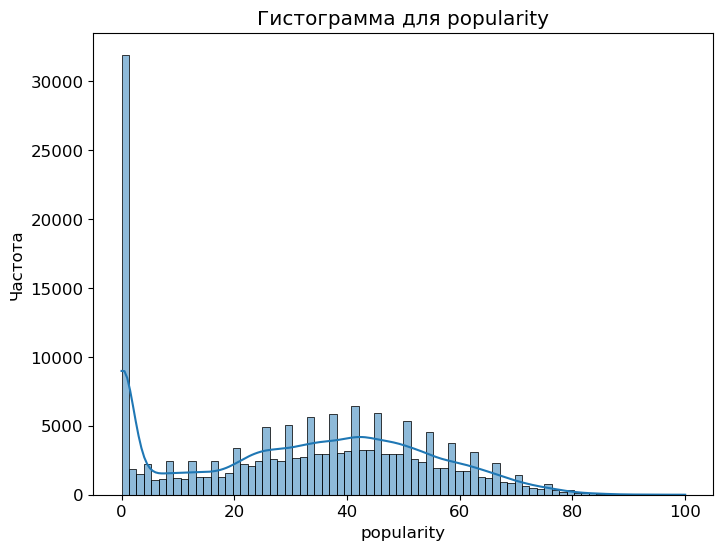

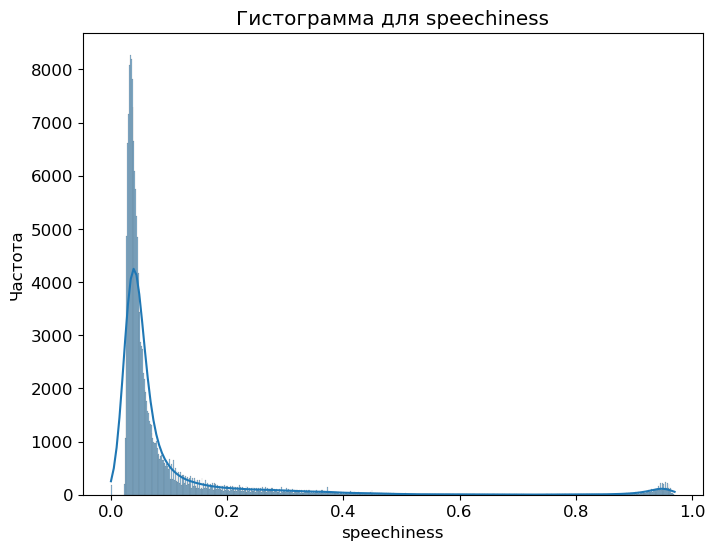

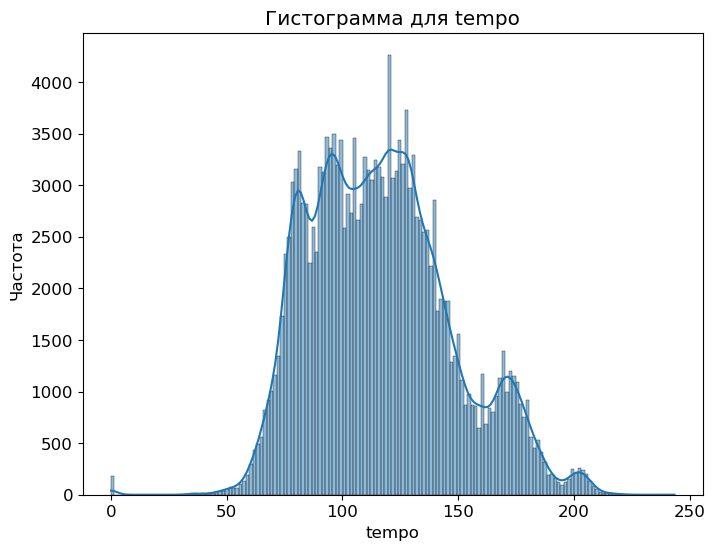

In [67]:
# Строим гистограммы для каждого числового признака
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(numerical_df[col], kde=True)  # kde - для отображения кривой плотности
    plt.title(f"Гистограмма для {col}")
    plt.xlabel(col)
    plt.ylabel("Частота")
    plt.show()

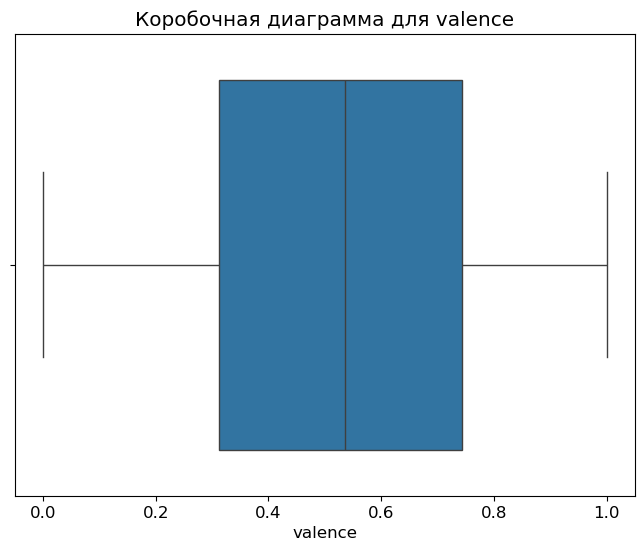

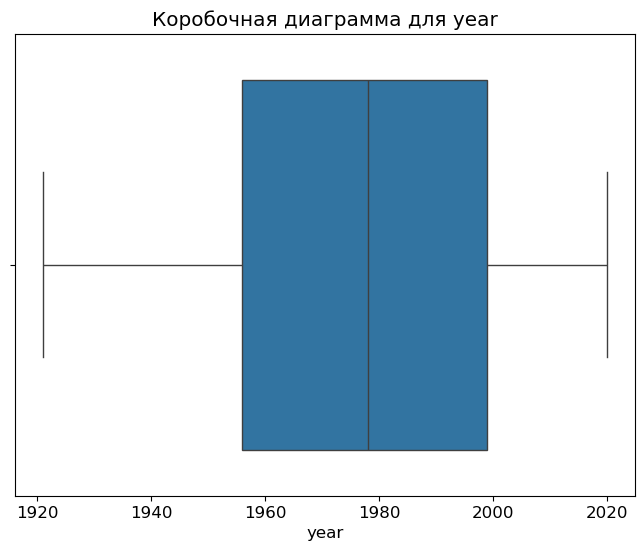

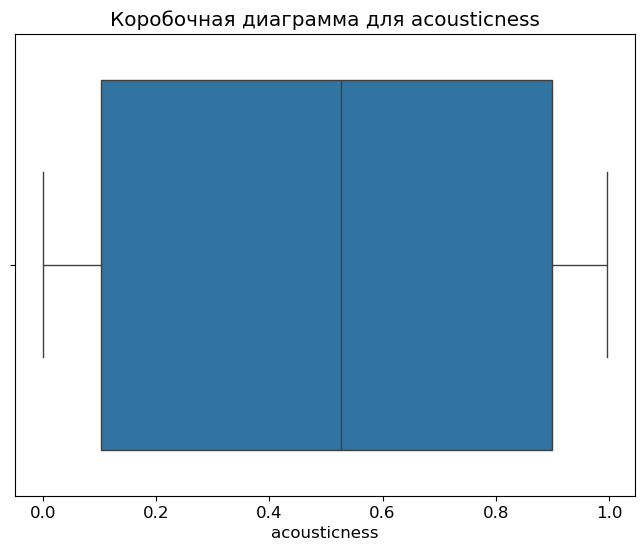

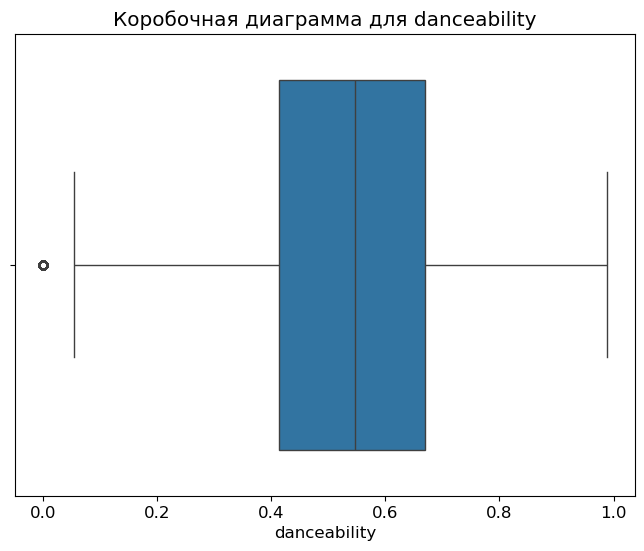

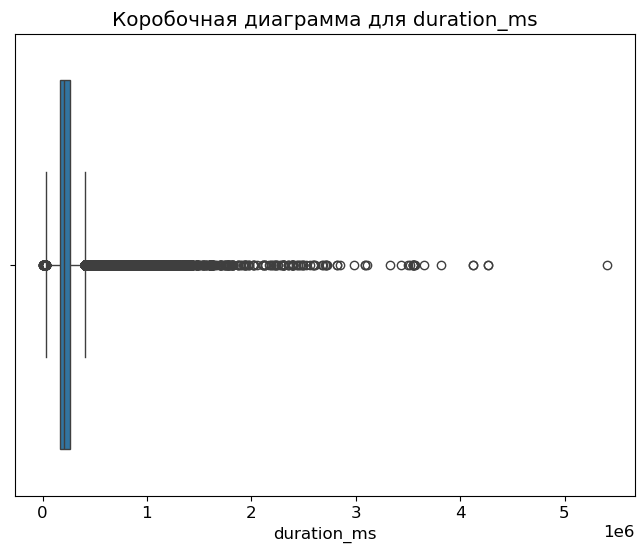

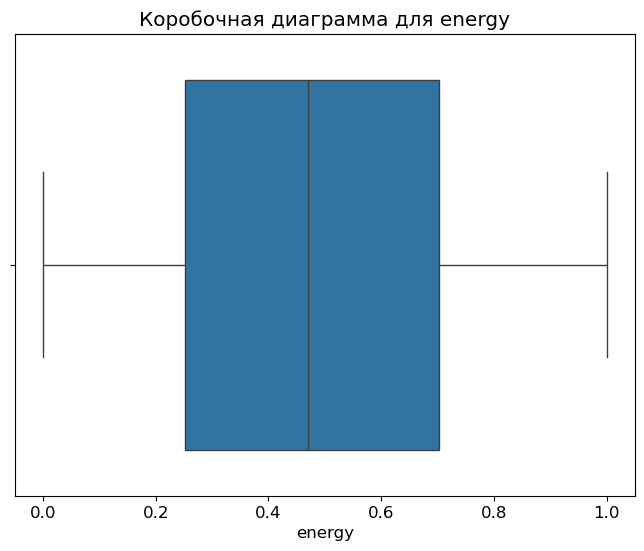

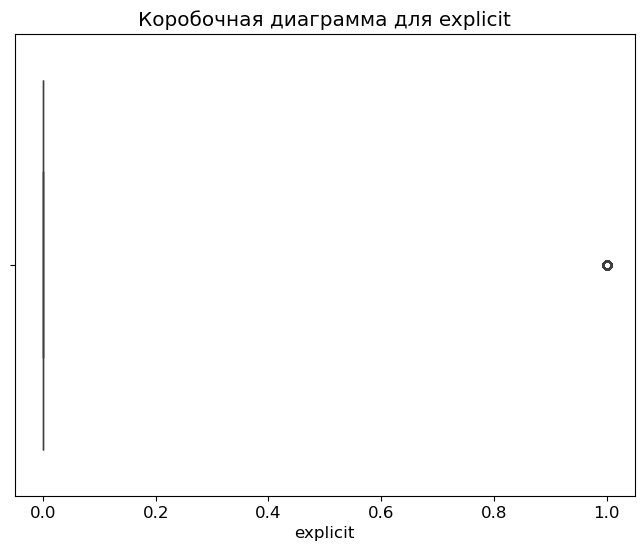

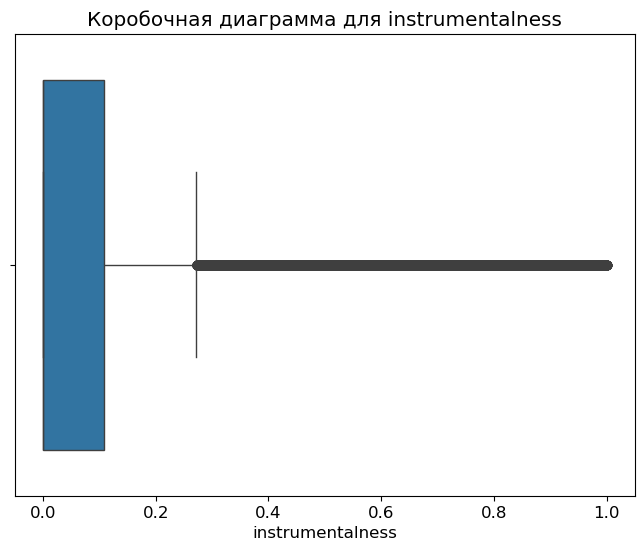

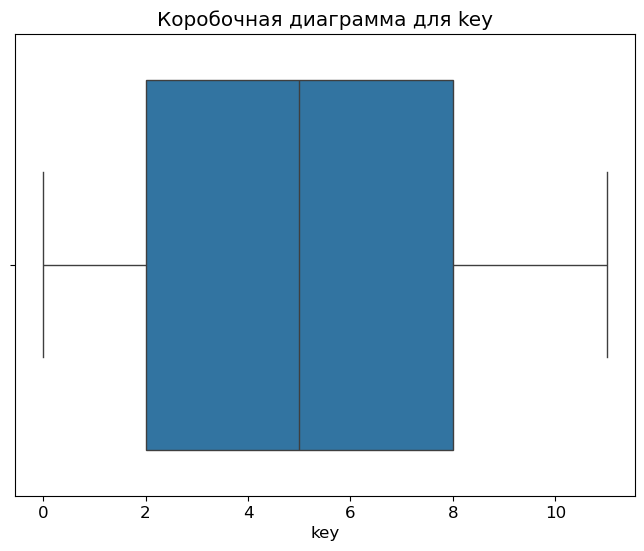

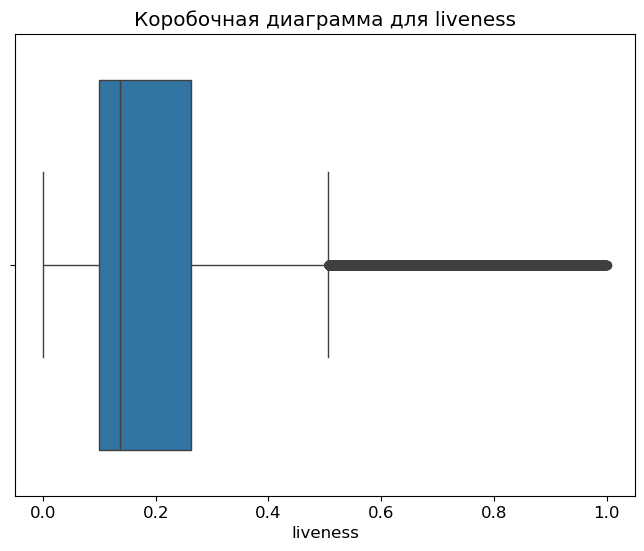

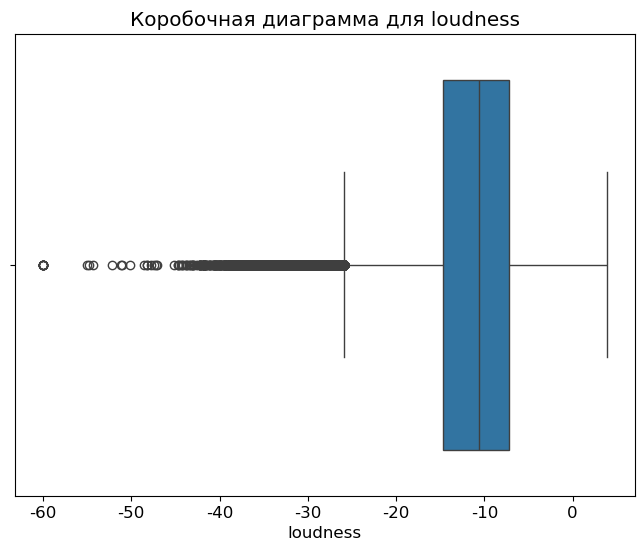

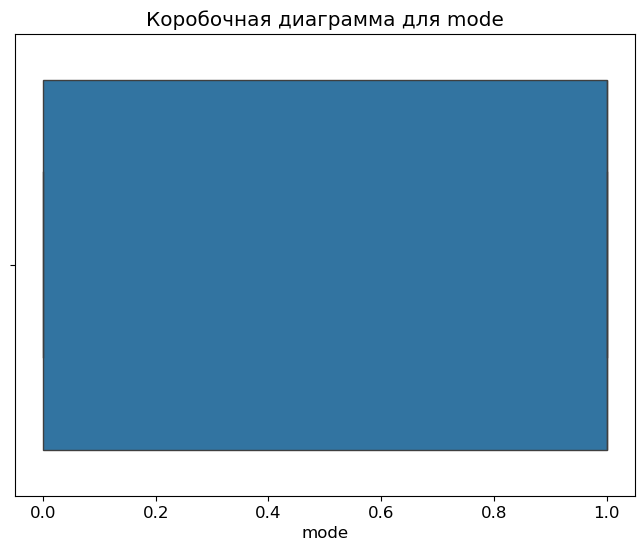

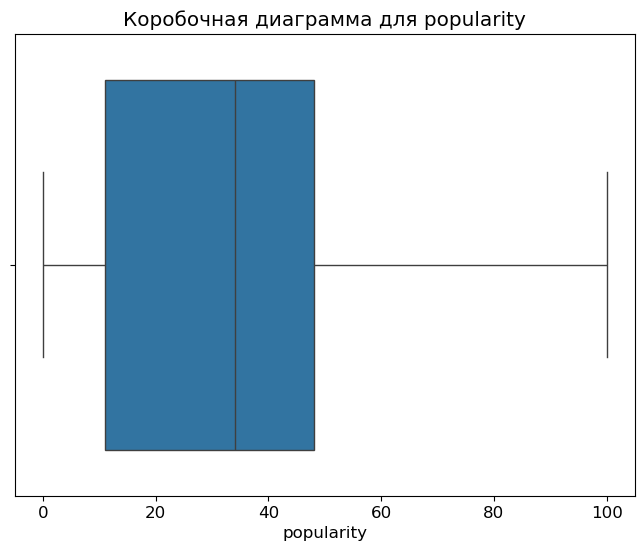

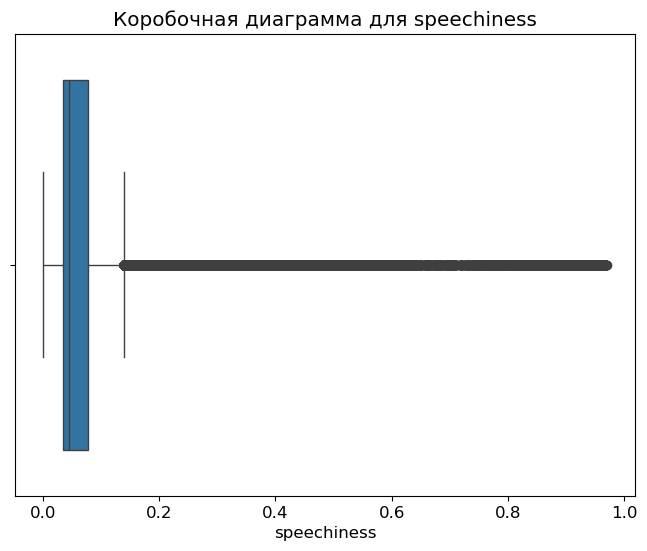

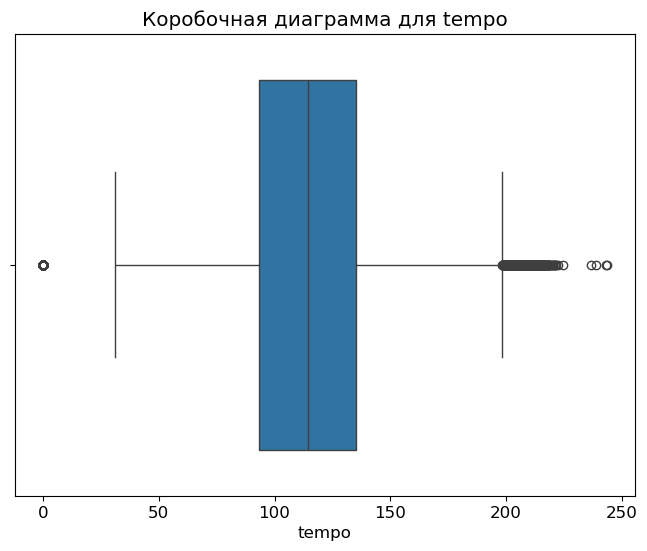

In [68]:
# Строим коробочные диаграммы для каждого числового признака
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=numerical_df[col])
    plt.title(f"Коробочная диаграмма для {col}")
    plt.xlabel(col)
    plt.show()

In [69]:
# определили выбросы 
# Список столбцов с выбросами
columns_with_outliers = ['duration_ms', 'explicit', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']

In [70]:
def cap_outliers(df, column, upper_quantile=0.95, lower_quantile=0.05):
    """Заменяем выбросы на значения верхнего и нижнего квантилей."""
    lower_bound = df[column].quantile(lower_quantile)
    upper_bound = df[column].quantile(upper_quantile)
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df


In [71]:
# Применяем функцию к каждому столбцу
df_no_outliers = main_df_work.copy()
for col in columns_with_outliers:
    if col in df_no_outliers.columns: # Проверяем, существует ли колонка
        print(f"Замена выбросов в столбце {col}")
        df_no_outliers = cap_outliers(df_no_outliers, col)  # Используем функцию cap_outliers
    else:
        print(f"Столбец {col} уже удален из DataFrame!")

print(f"Размер DataFrame: {len(main_df_work)}") # Размер не должен измениться
print(f"Размер DataFrame: {len(df_no_outliers)}") # Размер не должен измениться

Замена выбросов в столбце duration_ms
Замена выбросов в столбце explicit
Замена выбросов в столбце instrumentalness
Замена выбросов в столбце liveness
Замена выбросов в столбце loudness
Замена выбросов в столбце speechiness
Замена выбросов в столбце tempo
Размер DataFrame: 177753
Размер DataFrame: 177753


In [72]:
df_no_outliers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177753 entries, 0 to 177752
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           177753 non-null  float64
 1   year              177753 non-null  int64  
 2   acousticness      177753 non-null  float64
 3   artists           177753 non-null  object 
 4   danceability      177753 non-null  float64
 5   duration_ms       177753 non-null  int64  
 6   energy            177753 non-null  float64
 7   explicit          177753 non-null  int64  
 8   id                177753 non-null  object 
 9   instrumentalness  177753 non-null  float64
 10  key               177753 non-null  int64  
 11  liveness          177753 non-null  float64
 12  loudness          177753 non-null  float64
 13  mode              177753 non-null  int64  
 14  name              177753 non-null  object 
 15  popularity        177753 non-null  int64  
 16  release_date      17

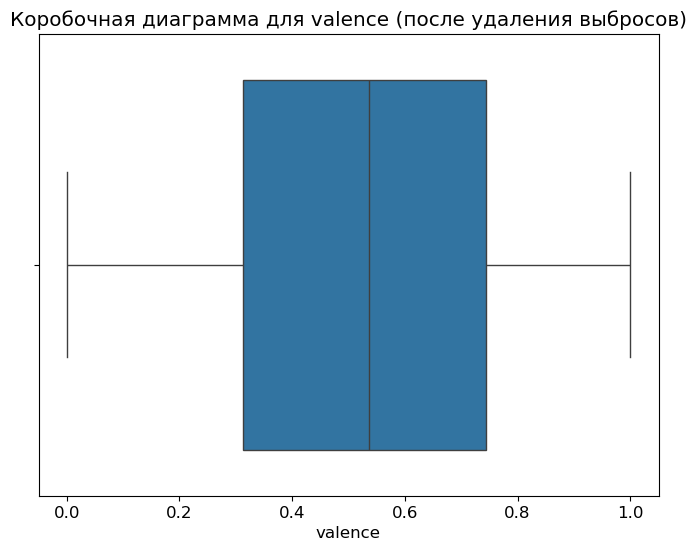

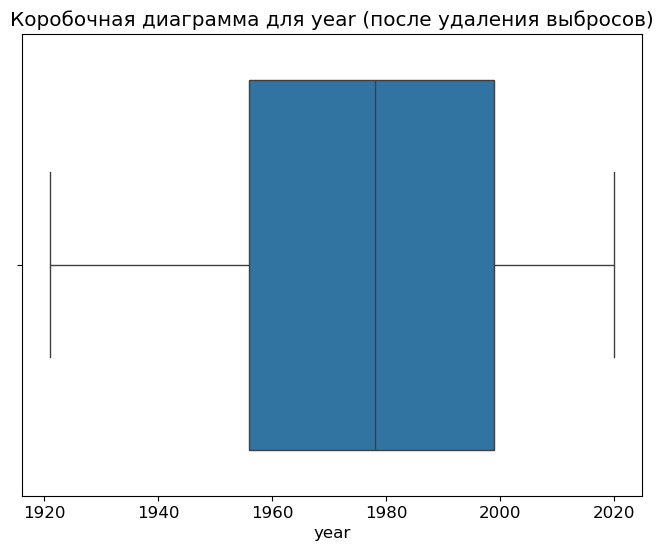

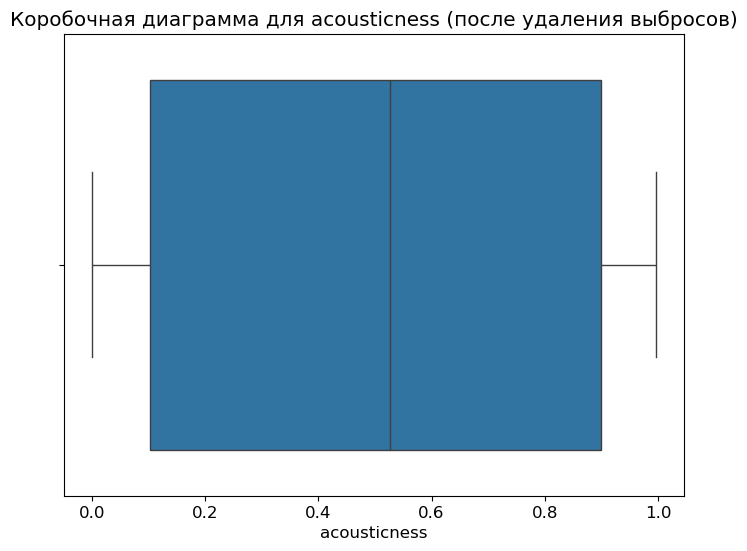

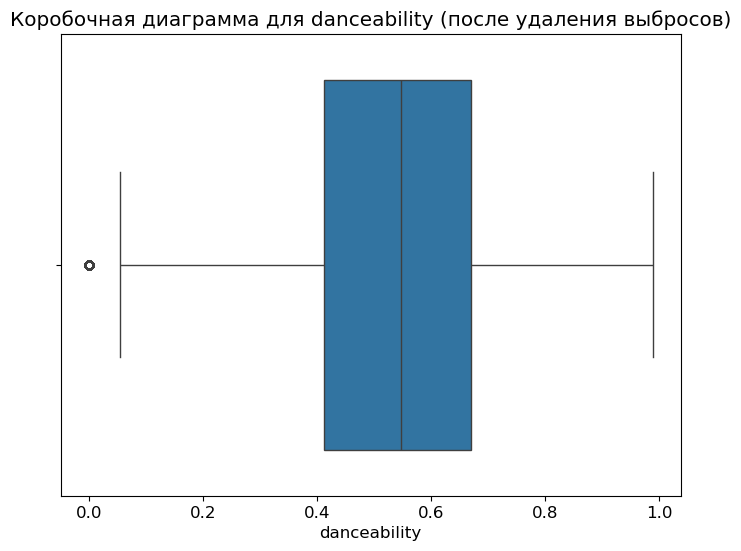

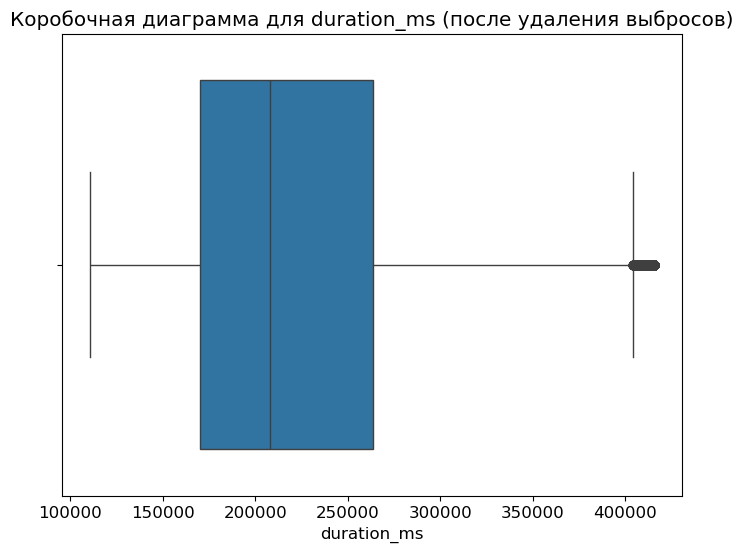

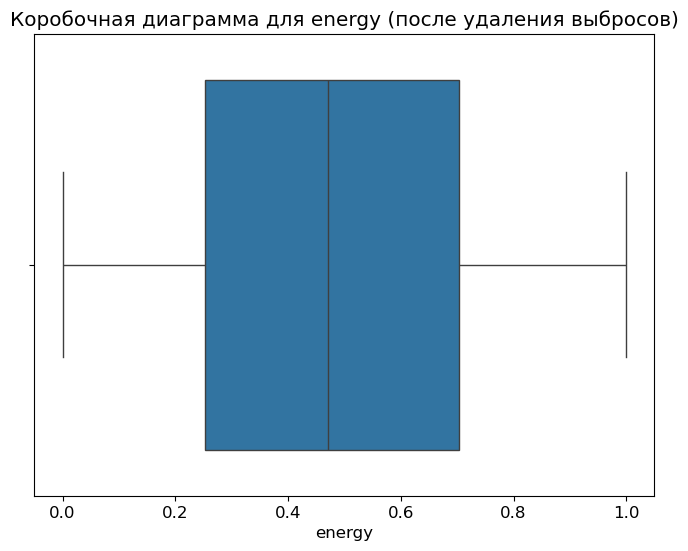

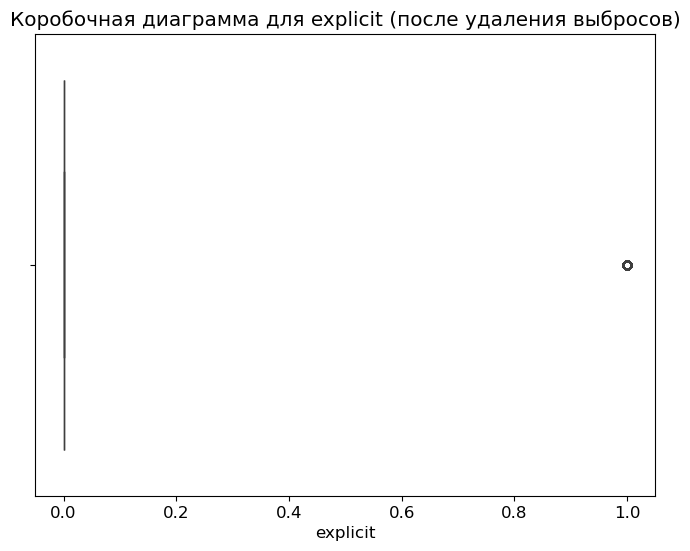

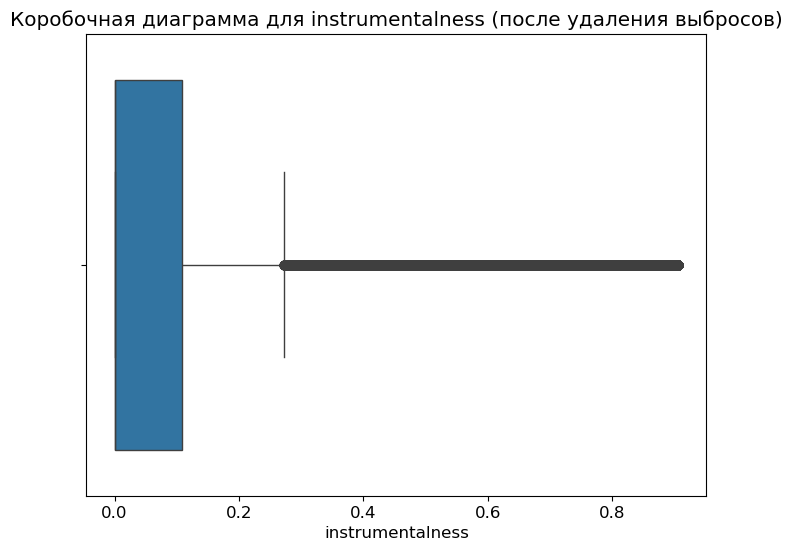

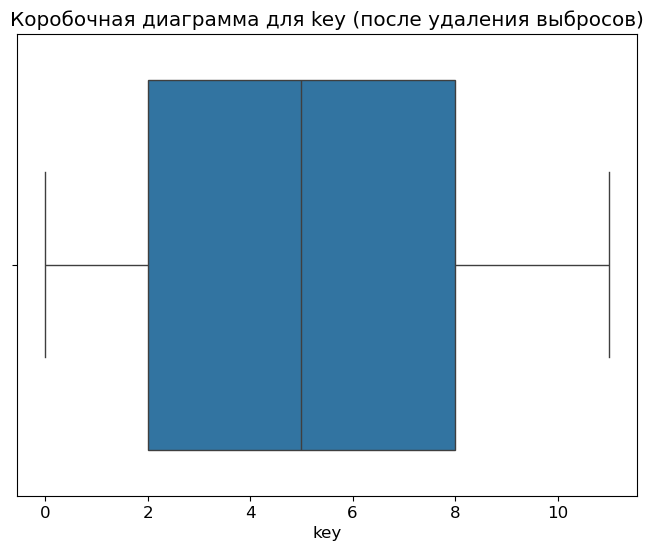

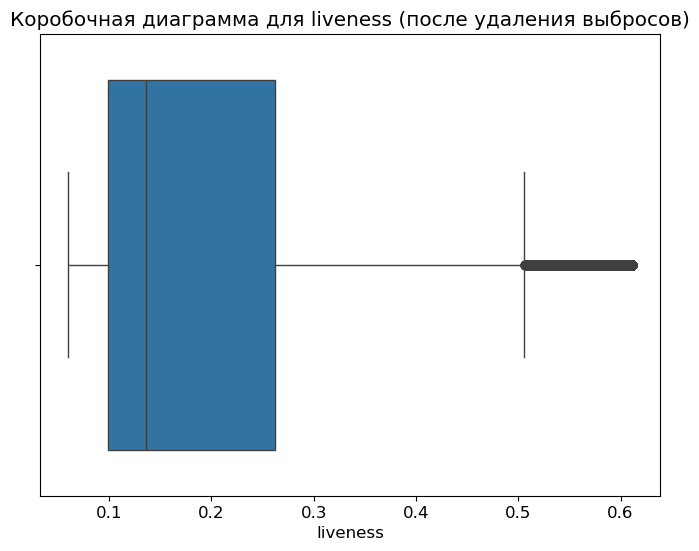

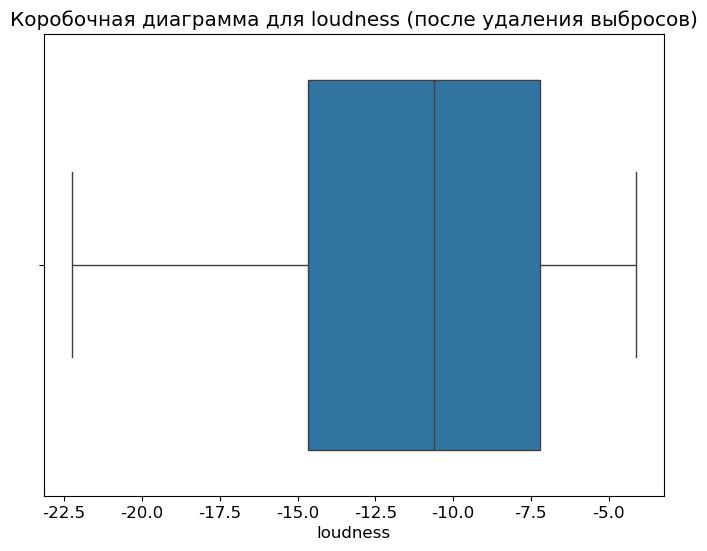

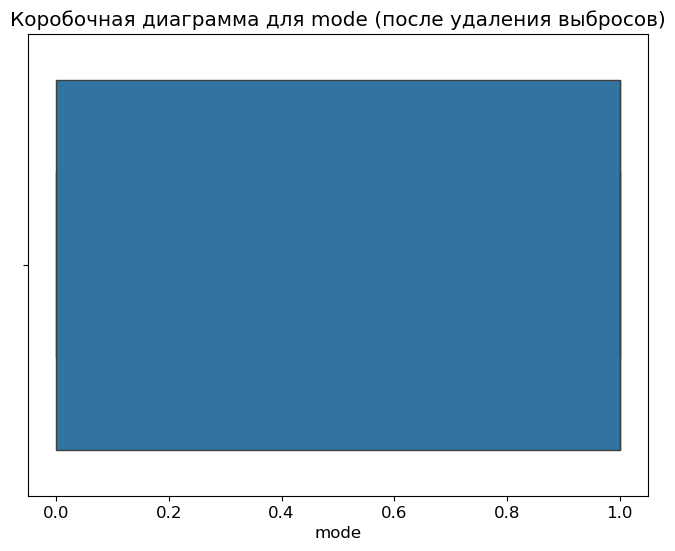

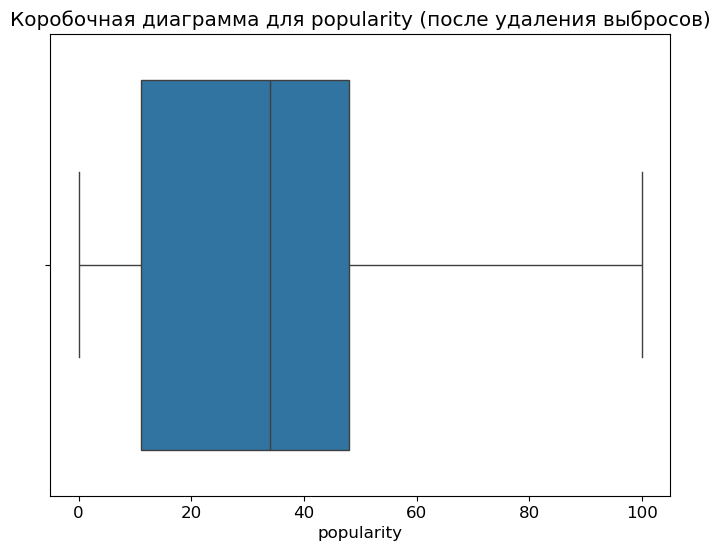

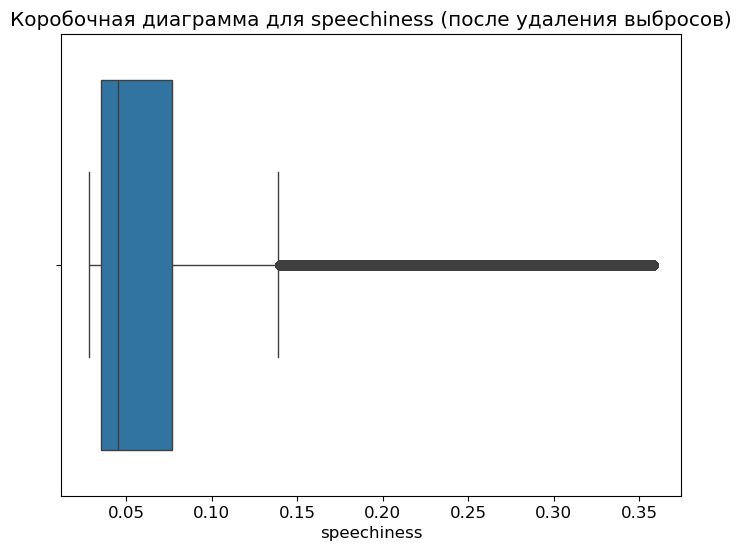

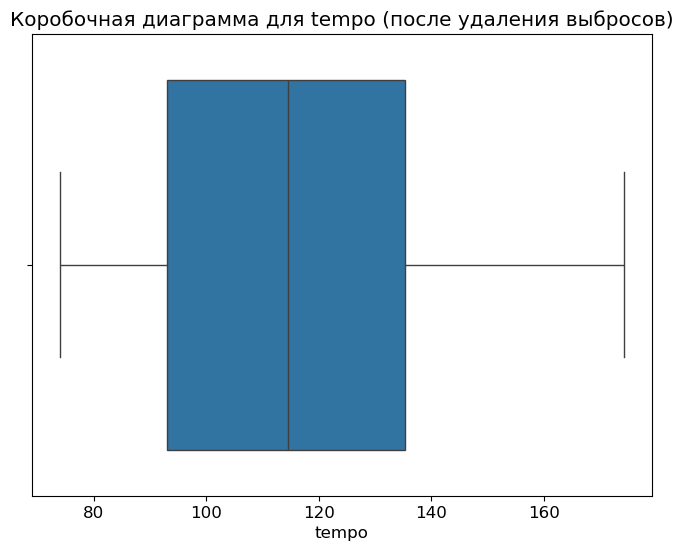

In [73]:
# Строим коробочные диаграммы для каждого числового признака ПОСЛЕ удаления выбросов
numerical_cols = df_no_outliers.select_dtypes(include=['number']).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_no_outliers[col])
    plt.title(f"Коробочная диаграмма для {col} (после удаления выбросов)")
    plt.xlabel(col)
    plt.show()

In [74]:
# Определяем категориальные столбцы
categorical_cols = df_no_outliers.select_dtypes(include=['object', 'category']).columns
categorical_cols

Index(['artists', 'id', 'name', 'release_date'], dtype='object')

In [75]:
# Анализируем каждый категориальный столбец
for col in categorical_cols:
    print(f"\nАнализ столбца: {col}")

    # Выводим уникальные значения и их количество
    print(f"  Уникальные значения: {main_df_work[col].unique()}")
    print(f"  Количество уникальных значений: {main_df_work[col].nunique()}")

    # 4. Выводим распределение частот
    print("\n  Распределение частот:")
    print(df_no_outliers[col].value_counts())
    


Анализ столбца: artists
  Уникальные значения: ["['Sergei Rachmaninoff', 'James Levine', 'Berliner Philharmoniker']"
 "['Dennis Day']"
 "['KHP Kridhamardawa Karaton Ngayogyakarta Hadiningrat']" ...
 "['Najma Wallin']"
 "['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna', 'J Balvin']"
 "['KEVVO', 'J Balvin']"]
  Количество уникальных значений: 34088

  Распределение частот:
artists
['Эрнест Хемингуэй']                                                                       1211
['Эрих Мария Ремарк']                                                                      1068
['Francisco Canaro']                                                                        942
['Frank Sinatra']                                                                           630
['Ignacio Corsini']                                                                         628
                                                                                           ... 
['Giuseppe Verdi', 'Heinrich Schlusnus', '

In [76]:
df_no_outliers[col].value_counts().head(10)

release_date
1945          1459
1949          1298
1948          1182
1926          1107
1935          1081
1930-01-01    1073
1940-01-01    1047
1951          1033
1946          1012
1956          1006
Name: count, dtype: int64

In [77]:
# # извлечение всех доступных шрифтов
# font_names = [f.name for f in matplotlib.font_manager.fontManager.ttflist]
# font_names
        

In [78]:
# Настройка шрифтов для Matplotlib
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']  # Указываем DejaVu Sans
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12  # Увеличиваем размер шрифта

In [89]:
# Проверяем, какие категориальные столбцы есть в df_no_outliers
categorical_cols = df_no_outliers.select_dtypes(include=['object', 'category']).columns
print("Категориальные столбцы:", categorical_cols)

Категориальные столбцы: Index(['artists', 'id', 'name', 'release_date'], dtype='object')


   valence  year  acousticness  danceability  duration_ms  energy  explicit  \
0   0.0594  1921         0.982         0.279       415402   0.211         0   
1   0.9630  1921         0.732         0.819       180533   0.341         0   
2   0.0394  1921         0.961         0.328       415402   0.166         0   
3   0.1650  1921         0.967         0.275       210000   0.309         0   
4   0.2530  1921         0.957         0.418       166693   0.193         0   

   instrumentalness  key  liveness  ...  name_Lacrimosa  \
0          0.878000   10     0.611  ...               0   
1          0.000000    7     0.160  ...               0   
2          0.906000    3     0.101  ...               0   
3          0.000028    5     0.381  ...               0   
4          0.000002    3     0.229  ...               0   

   name_Piano Concerto in B-Flat (Tonight We Love)  name_明天會更好  \
0                                                0           0   
1                                     

/home/tatiana/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 26126 (\N{CJK UNIFIED IDEOGRAPH-660E}) missing from current font.
  fig.canvas.draw()
/home/tatiana/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 22825 (\N{CJK UNIFIED IDEOGRAPH-5929}) missing from current font.
  fig.canvas.draw()
/home/tatiana/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 26371 (\N{CJK UNIFIED IDEOGRAPH-6703}) missing from current font.
  fig.canvas.draw()
/home/tatiana/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 26356 (\N{CJK UNIFIED IDEOGRAPH-66F4}) missing from current font.
  fig.canvas.draw()
/home/tatiana/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 22909 (\N{CJK UNIFIED IDEOGRAPH-597D}) missing from current font.
  fig.canvas.draw()
/home/tatiana/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 2

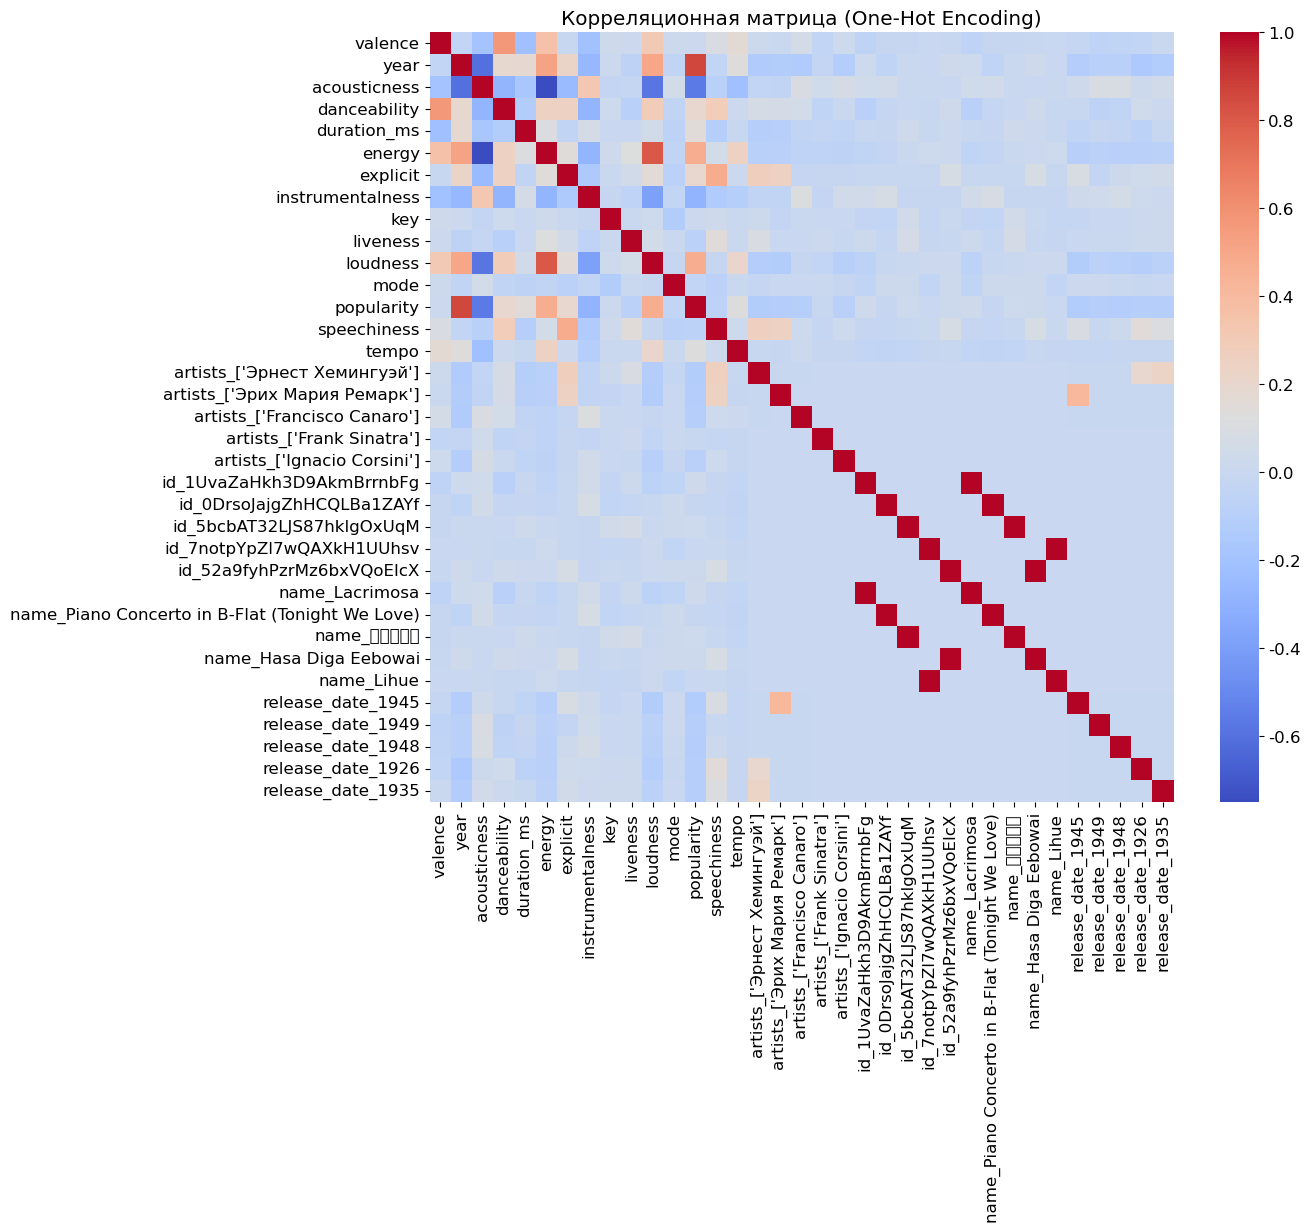

In [94]:
# Функция для One-Hot Encoding с ограничением категорий
def one_hot_encode_top_n(df, variable, top_n=10):
    top_labels = df[variable].value_counts().head(top_n).index
    for label in top_labels:
        df[variable + '_' + str(label)] = np.where(df[variable] == label, 1, 0)
    return df

# Создаем копию df_no_outliers для кодирования
encoded_df = df_no_outliers.copy()

# Применяем One-Hot Encoding к каждому категориальному столбцу
for col in categorical_cols:
    encoded_df = one_hot_encode_top_n(encoded_df, col, top_n=5)  # Ограничиваем до 5 категорий

# Удаляем исходные категориальные столбцы
encoded_df = encoded_df.drop(columns=categorical_cols)

# Проверяем результат
print(encoded_df.head())

# Вычисляем корреляционную матрицу
correlation_matrix = encoded_df.corr()

# Визуализируем корреляционную матрицу
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица (One-Hot Encoding)")
plt.show()

In [1505]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177753 entries, 0 to 177752
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           177753 non-null  float64
 1   year              177753 non-null  int64  
 2   acousticness      177753 non-null  float64
 3   artists           177753 non-null  object 
 4   danceability      177753 non-null  float64
 5   duration_ms       177753 non-null  int64  
 6   energy            177753 non-null  float64
 7   explicit          177753 non-null  int64  
 8   id                177753 non-null  object 
 9   instrumentalness  177753 non-null  float64
 10  key               177753 non-null  int64  
 11  liveness          177753 non-null  float64
 12  loudness          177753 non-null  float64
 13  mode              177753 non-null  int64  
 14  name              177753 non-null  object 
 15  popularity        177753 non-null  int64  
 16  release_date      17

In [144]:
# выбираем характеристики для анализа
features = df_no_outliers[['valence', 'popularity', 'danceability', 'acousticness', 'tempo', 'loudness', 'speechiness']]

In [120]:
correlation_matrix = features.corr()
correlation_matrix

,valence,popularity,danceability,acousticness,tempo,loudness,speechiness
valence,1.000000,0.012764,0.565791,-0.191923,0.169666,0.314128,0.091994
popularity,0.012764,1.000000,0.194083,-0.561882,0.127910,0.470161,-0.067555
danceability,0.565791,0.194083,1.000000,-0.283001,0.011878,0.293198,0.287760
acousticness,-0.191923,-0.561882,-0.283001,1.000000,-0.212487,-0.586284,-0.093999
tempo,0.169666,0.127910,0.011878,-0.212487,1.000000,0.207067,0.022615
loudness,0.314128,0.470161,0.293198,-0.586284,0.207067,1.000000,-0.012779
speechiness,0.091994,-0.067555,0.287760,-0.093999,0.022615,-0.012779,1.000000


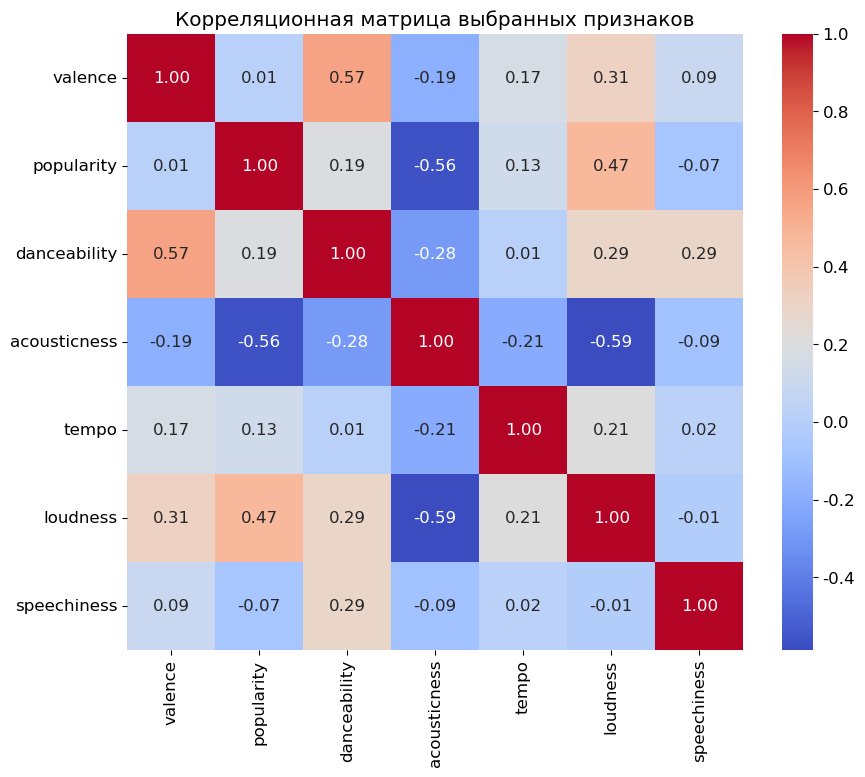

In [122]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Корреляционная матрица выбранных признаков')
plt.show()

In [146]:
# реализация задания 2
# будем использовать алгоритм K-means для кластеризации песен на основе их характеристик
# Нормализация данных
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [201]:
k = 10  # изменить это значение
kmeans = KMeans(n_clusters=k, random_state=42)
df_no_outliers['cluster'] = kmeans.fit_predict(scaled_features)

In [350]:
def recommend_songs(song_name, df, num_recommendations=5):
    # Проверяем, есть ли песня в датафрейме
    if song_name not in df['name'].values:
        return f"Песня '{song_name}' не найдена в базе данных."

    # Находим кластер выбранной песни
    cluster_id = df[df['name'] == song_name]['cluster'].values[0]

    # Находим песни из того же кластера
    recommendations = df[df['cluster'] == cluster_id]

    # Исключаем саму выбранную песню
    recommendations = recommendations[recommendations['name'] != song_name]

    # Проверяем, есть ли достаточно песен для рекомендаций
    if recommendations.empty:
        return f"Нет доступных рекомендаций для песни '{song_name}'."

    # Если недостаточно песен, возвращаем все доступные
    if len(recommendations) < num_recommendations:
        num_recommendations = len(recommendations)

    # Возвращаем случайные рекомендации
    return recommendations.sample(num_recommendations)

# Пример вызова функции
recommended_songs = recommend_songs('yesterday', df_no_outliers)

# Обработка результата
if isinstance(recommended_songs, str):
    print(recommended_songs)  # Сообщение об ошибке
else:
    print(recommended_songs[['name', 'artists', 'popularity']])


                                                    name  \
123867                                   Poor Twisted Me   
37289                                      Daddy's Lambo   
169427                              I'm In Love With You   
128036  Massive in Miami - David Amo & Julio Navas Remix   
136794                               Keep Us on the Road   

                                                  artists  popularity  
123867                                      ['Metallica']          36  
37289                                        ['Yelawolf']          60  
169427                                        ['DeBarge']          23  
128036  ['Paul Richard', 'Daniel Chord', 'David Amo', ...           0  
136794                                      ['Motörhead']          30  


In [206]:
# надо попробовать DBSCAN
# Настройка параметров DBSCAN
dbscan = DBSCAN(eps=0.4, min_samples=5)  # Параметры могут быть изменены
df_no_outliers['cluster'] = dbscan.fit_predict(scaled_features)

In [207]:
def recommend_songs_dbscan(song_name, df, num_recommendations=5):
    # Проверяем, есть ли песня в датафрейме
    if song_name not in df['name'].values:
        return f"Песня '{song_name}' не найдена в базе данных."

    # Находим кластер выбранной песни
    cluster_id = df[df['name'] == song_name]['cluster'].values[0]

    # Проверяем, является ли песня шумом
    if cluster_id == -1:
        return f"Песня '{song_name}' является шумом и не имеет рекомендаций."

    # Находим песни из того же кластера
    recommendations = df[df['cluster'] == cluster_id]

    # Исключаем саму выбранную песню
    recommendations = recommendations[recommendations['name'] != song_name]

    # Проверяем, есть ли достаточно песен для рекомендаций
    if recommendations.empty:
        return f"Нет доступных рекомендаций для песни '{song_name}'."

    # Если недостаточно песен, возвращаем все доступные
    if len(recommendations) < num_recommendations:
        num_recommendations = len(recommendations)

    # Возвращаем случайные рекомендации
    return recommendations.sample(num_recommendations)

# Пример вызова функции
recommended_songs = recommend_songs_dbscan('yesterday', df_no_outliers)

# Обработка результата
if isinstance(recommended_songs, str):
    print(recommended_songs)  # Сообщение об ошибке
else:
    print(recommended_songs[['name', 'artists', 'popularity']])


                                                     name  \
117270                                  Your Kiss Of Fire   
170900  Never Let Me Down Again - Live at Rose Bowl, P...   
33796                                      Venus as a Boy   
135645                                      True Religion   
68803                               Don't Do Me Like That   

                                    artists  popularity  
117270                     ['The Supremes']          19  
170900                     ['Depeche Mode']          28  
33796                             ['Björk']          49  
135645                         ['Hot Tuna']          23  
68803   ['Tom Petty and the Heartbreakers']          32  


In [187]:
# сколько песен было отнесено к шуму.
noise_count = (df_no_outliers['cluster'] == -1).sum()
print(f"Количество шумовых песен: {noise_count}")

Количество шумовых песен: 67738


In [238]:
# Создание гибридной рекомендательной системы, которая сочетает контентную фильтрацию и K-means
def content_based_recommendations(song_name, df, num_recommendations=5):
    if song_name not in df['name'].values:
        return pd.DataFrame(columns=['name', 'artists', 'popularity'])  # Возвращаем пустой DataFrame

    song_features = df[df['name'] == song_name].drop(columns=['name', 'artists', 'cluster']).values
    similarities = cosine_similarity(song_features, scaled_features).flatten()
    similar_indices = np.argsort(similarities)[::-1][1:num_recommendations + 1]
    return df.iloc[similar_indices][['name', 'artists', 'popularity']]

In [240]:
def hybrid_recommendations_kmeans(song_name, df, num_recommendations=5):
    if song_name not in df['name'].values:
        return "Песня не найдена в базе данных."

    cluster_id = df[df['name'] == song_name]['cluster'].values[0]
    
    # Находим песни из того же кластера
    cluster_recommendations = df[df['cluster'] == cluster_id]
    cluster_recommendations = cluster_recommendations[cluster_recommendations['name'] != song_name]
    
    # Если в кластере недостаточно песен, используем контентную фильтрацию
    if len(cluster_recommendations) < num_recommendations:
        additional_recommendations_count = num_recommendations - len(cluster_recommendations)
        additional_recommendations = content_based_recommendations(song_name, df, additional_recommendations_count)
        combined_recommendations = pd.concat([cluster_recommendations[['name', 'artists', 'popularity']], additional_recommendations])
        return combined_recommendations

    # Возвращаем случайные рекомендации из кластера
    return cluster_recommendations.sample(num_recommendations)[['name', 'artists', 'popularity']]

In [252]:
# Пример использования
test_songs = ['Shape of You', 'Blinding Lights', 'Levitating']  # Замените на свои песни
for song in test_songs:
    recommended_songs = hybrid_recommendations_kmeans(song, df_no_outliers, num_recommendations=5)
    print(f"Рекомендации для '{song}':")
    print(recommended_songs)
    print("\n")

Рекомендации для 'Shape of You':
                                                   name  \
82811            I Wish I Had A Horse - Remastered 1999   
135001                            It's Not What You Say   
64492                   There Goes My Baby - Remastered   
53998   Ooh Aah...Just a Little Bit - Motiv8 Radio Edit   
69643                                 Must Be the Music   

                          artists  popularity  
82811   ['Alvin & The Chipmunks']          14  
135001          ['Louie Ramirez']          24  
64492            ['Ricky Nelson']          22  
53998        ['Gina G', 'Motiv8']          57  
69643           ['Secret Weapon']          32  


Рекомендации для 'Blinding Lights':
                                         name                  artists  \
151625         Stop Lookin' Back - Remastered  ['Grand Funk Railroad']   
117051                            In The Mood            ['Roy Clark']   
51813   Bullet The Blue Sky - Remastered 2007                   

In [352]:
# надо попробовать DBSCAN
# Настройка параметров DBSCAN
dbscan = DBSCAN(eps=0.4, min_samples=5)  # Параметры могут быть изменены
df_no_outliers['cluster'] = dbscan.fit_predict(scaled_features)

In [356]:
def recommend_songs_dbscan(song_name, df, num_recommendations=5):
    # Проверяем, есть ли песня в датафрейме
    if song_name not in df['name'].values:
        return f"Песня '{song_name}' не найдена в базе данных."

    # Находим кластер выбранной песни
    cluster_id = df[df['name'] == song_name]['cluster'].values[0]

    # Проверяем, является ли песня шумом
    if cluster_id == -1:
        return f"Песня '{song_name}' является шумом и не имеет рекомендаций."

    # Находим песни из того же кластера
    recommendations = df[df['cluster'] == cluster_id]

    # Исключаем саму выбранную песню
    recommendations = recommendations[recommendations['name'] != song_name]

    # Проверяем, есть ли достаточно песен для рекомендаций
    if recommendations.empty:
        return f"Нет доступных рекомендаций для песни '{song_name}'."

    # Если недостаточно песен, возвращаем все доступные
    if len(recommendations) < num_recommendations:
        num_recommendations = len(recommendations)

    # Возвращаем случайные рекомендации
    return recommendations.sample(num_recommendations)

# Пример вызова функции
recommended_songs = recommend_songs_dbscan('yesterday', df_no_outliers)

# Обработка результата
if isinstance(recommended_songs, str):
    print(recommended_songs)  # Сообщение об ошибке
else:
    print(recommended_songs[['name', 'artists', 'popularity']])


                                                    name  \
75917                                              Venus   
11673                                     Sun Is Shining   
35199                                Todo Me Gusta de Ti   
46137  Andante spianato and Grande Polonaise in E-Fla...   
71250                                If I Had Only Known   

                                        artists  popularity  
75917                             ['Lady Gaga']          61  
11673              ['Bob Marley & The Wailers']          57  
35199                        ['Los Caminantes']          52  
46137  ['Frédéric Chopin', 'Arthur Rubinstein']          19  
71250                         ['Reba McEntire']          38  


In [256]:
users_dict = {
    'Дмитрий Навой': [17493,  17732, 50266, 50803, 52028, 66552, 66694, 67720, 67859, 82035, 
        84920, 85985, 89997, 99515, 99731, 100004, 100355, 100417,  100621, 100751, 
        100877, 101008, 101258, 101286,  124929, 124951, 125005, 149019, 149569, 152432],
    'Pavel': [70312, 27916, 147255, 8062, 9302, 26983, 147548, 132730, 67813, 10429, 30652, 
        8517, 95461, 132175,145959, 120376, 12469, 16118, 132437, 34729, 16134, 10922, 
        12240, 70500, 129707, 12519, 12549, 12418, 13812, 13822, 12828, 50023, 14015, 15812, 16715],
    'Anetta': [106794, 107005, 121901, 14704, 85028, 35573, 54325, 16877, 121675, 16612, 137053, 18020, 
        19600, 16211, 16384, 151967, 13812, 15831, 53638, 16872, 18426, 89878, 104987, 87054, 106686,
        138705, 17054, 88507, 55998, 73894],
    'Татьяна Качан': [288, 298, 317, 619, 629, 887, 896, 900, 906, 910, 1233, 1240, 1274, 1280, 1716, 1719, 1756, 
        1960, 4221, 4424, 4431, 4454, 8841, 8846, 8864, 8873, 9085, 9359, 9370, 9437],
    'Железный Дровосек': [3513, 15435, 15514, 33832, 36293, 73082, 85294, 85802, 85817, 86012, 86229, 88226, 88386, 
         88584, 88785, 115424, 115430, 165599, 60412, 52454, 84725, 86699, 101964, 73261, 119531, 
         120168, 120098, 132087, 169747, 12279],
    'Валерий Кузнецов': [56639, 56964, 154840, 170183, 16916, 17417, 17437, 17484, 37203, 55143, 
                         55979, 122634, 124628, 153408, 17465, 18100, 37072, 153425, 169636, 37242, 
                         18318, 37918, 37922, 74531, 124616, 140207, 170354, 17448, 17860, 90202],
    'Борис': [53045, 34468, 139387, 107424, 17811, 17832, 18136, 36744, 140393, 38495, 9419, 
              56023, 12996, 19618, 55103, 17461, 37710, 32763, 31490, 18292, 12009, 68155, 
              16670, 13450, 50691, 17838, 19022, 18691, 17809, 19047],
    'Yulia': [18247, 18391, 170386, 15895, 15717, 16284, 53356, 70390, 98318, 165886, 19586, 17271, 
              18969, 73837, 9548, 37179, 74186, 74052, 74001, 18128, 18122, 18111, 18083, 18075, 
              17987, 17920, 17880, 17672, 14796, 37276],
    '.': [15609, 15628, 14412, 15239, 15293, 15285, 15809, 16628, 17799, 36745, 16917, 16980, 108542, 
          123719, 16054, 169623, 16615, 72214, 35381, 121357, 15630, 15633, 15473, 74617, 18440, 17025,
          18412, 19021, 18423, 17836],
    'Тимофей Цыкман': [16001, 54294, 11606, 73727, 16396, 15608, 16430, 34974, 121529, 72962, 55253, 17290, 
                       106646, 12520, 15814, 17291, 15055, 15880, 122021, 9611, 167392, 152458, 9624, 17417, 
                       18093, 13806, 120716, 36715, 91111, 11933,],
    }

In [258]:
data.head(2)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936


In [260]:
class UsersPreferences:
    def __init__(self, data, users_dict):
        self.data = data
        self.users_dict = users_dict
        self.users = self.users_dict.keys()
        self.users_preference_data = pd.DataFrame()

    def make_users_preference_df(self):
        
        for user_id, user in enumerate(self.users, 1):
            next_user_data = self.data.loc[self.users_dict[user]]
            next_user_data.insert(0, 'user_name', user)
            next_user_data.insert(0, 'user_ID', user_id)
            self.users_preference_data = pd.concat([self.users_preference_data, next_user_data])

        return self.users_preference_data
            

In [262]:
user_pr = UsersPreferences(data=data, users_dict=users_dict)
user_df = user_pr.make_users_preference_df()

In [264]:
user_df['user_name'].value_counts()

user_name
Pavel                35
Дмитрий Навой        30
Anetta               30
Татьяна Качан        30
Железный Дровосек    30
Валерий Кузнецов     30
Борис                30
Yulia                30
.                    30
Тимофей Цыкман       30
Name: count, dtype: int64

In [268]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, 17493 to 11933
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_ID           305 non-null    int64  
 1   user_name         305 non-null    object 
 2   valence           305 non-null    float64
 3   year              305 non-null    int64  
 4   acousticness      305 non-null    float64
 5   artists           305 non-null    object 
 6   danceability      305 non-null    float64
 7   duration_ms       305 non-null    int64  
 8   energy            305 non-null    float64
 9   explicit          305 non-null    int64  
 10  id                305 non-null    object 
 11  instrumentalness  305 non-null    float64
 12  key               305 non-null    int64  
 13  liveness          305 non-null    float64
 14  loudness          305 non-null    float64
 15  mode              305 non-null    int64  
 16  name              305 non-null    object 
 

In [288]:
# создаем функцию для получения рекомендации
def get_recommendations_for_users(user_df, df, num_recommendations=5):
    recommendations = {}
    for index, row in user_df.iterrows():
        song_name = row['name']
        
        # Получаем рекомендации для каждой песни
        recs = hybrid_recommendations_kmeans(song_name, df, num_recommendations)
        
        if song_name not in recommendations:
            recommendations[song_name] = recs['name'].tolist()  # Сохраняем только имена рекомендованных песен
        else:
            recommendations[song_name].extend(recs['name'].tolist())
    
    return recommendations

In [290]:
# Получаем рекомендации
recommendations = get_recommendations_for_users(user_df, df_no_outliers, num_recommendations=5)

In [292]:
# Выводим рекомендации для каждой песни
for song, recs in recommendations.items():
    print(f"Рекомендации для '{song}': {recs}")

Рекомендации для 'Do You Remember': ['El Fuegazo de Tus Ojos - Remasterizado', 'Loner', "Long Gone (From the Bowlin' Green)", 'Come Back Baby', 'Κάτσε να πιούμε ένα κρασί']
Рекомендации для 'Big Jet Plane': ['Granada', 'Speak Low', "I Won't Share You - 2011 Remaster", 'Refugees - Remastered', 'Nuclear War']
Рекомендации для 'Rumbleseat': ['Walk Man', 'Vencedor', 'Afternoon Tea - Mono Mix', 'Riding With The King', 'Seether']
Рекомендации для 'Everything I Miss At Home': ['Walls', 'One Night At A Time', 'If I Lost You', 'West Side Story: Act I: Dance at the Gym: Blues - Promenade - Mambo - Pas de deux - Jump', "L'amour avec toi"]
Рекомендации для 'Use Me': ['Backseat Driver', 'Lyrics Of Fury', 'Yes Sir, That’s My Baby - Alternate Take', 'Eres Tu', 'Bésame']
Рекомендации для 'Stayin’ Alive - Serban Mix': ['Gracias A La Vida', 'Sexy Dancer', 'You Should Be Dancing - Edit / From "Saturday Night Fever" Soundtrack', 'She Has a Girlfriend Now', 'Come with Me Now']
Рекомендации для '四面道歌 (2019 

In [306]:
# получаем рекомендации пользователей
def get_recommendations_for_users(user_df, df, num_recommendations=5):
    user_recommendations = {}
    
    for user_id in user_df['user_ID'].unique():
        # Получаем все песни, выбранные пользователем
        user_songs = user_df[user_df['user_ID'] == user_id]['name'].tolist()
        
        # Для хранения всех рекомендаций для данного пользователя
        recommendations_for_user = []
        
        for song_name in user_songs:
            # Получаем рекомендации для каждой песни
            recs = hybrid_recommendations_kmeans(song_name, df, num_recommendations)
            recommendations_for_user.extend(recs['name'].tolist())  # Добавляем рекомендации
        
        user_recommendations[user_id] = recommendations_for_user  # Сохраняем рекомендации для пользователя
    
    return user_recommendations

In [310]:
# метрики оценки
def calculate_metrics(user_df, recommendations, num_recommendations=5):
    relevant_count = 0
    recommended_relevant_count = 0
    
    for user_id in user_df['user_ID'].unique():
        user_songs = user_df[user_df['user_ID'] == user_id]['name'].tolist()
        recommended_songs = set(recommendations.get(user_id, []))

        # Подсчет релевантных рекомендаций
        relevant_count += len(user_songs)
        recommended_relevant_count += len(set(user_songs).intersection(recommended_songs))
        
        print(f"Пользователь {user_id}: Релевантные песни {user_songs}, Рекомендации {recommended_songs}")

    precision = recommended_relevant_count / (num_recommendations * len(recommendations)) if len(recommendations) > 0 else 0
    recall = recommended_relevant_count / relevant_count if relevant_count > 0 else 0

    print(f"Общее количество релевантных песен: {relevant_count}")
    print(f"Количество рекомендованных релевантных песен: {recommended_relevant_count}")
    
    return precision, recall

In [312]:
# Получаем рекомендации для всех пользователей
recommendations = get_recommendations_for_users(user_df, df_no_outliers, num_recommendations=5)

# 2. Расчет метрик
precision, recall = calculate_metrics(user_df, recommendations, num_recommendations=5)

# 3. Вывод метрик
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Пользователь 1: Релевантные песни ['Do You Remember', 'Big Jet Plane', 'Rumbleseat', 'Everything I Miss At Home', 'Use Me', 'Stayin’ Alive - Serban Mix', '四面道歌 (2019 Remastering)', 'Kick out the Jams', 'Some Heads Are Gonna Roll - Remastered', "Goin' Down Slow", 'Catapult', 'Breaking The Silence - Remastered 2003', 'Already Gone', 'Devotion', 'Yum Yum (Gimme Some)', 'Bread and Roses', 'No llores por mí argentina', "Cheatin' Woman", 'X-Ray Eyes', "L'encre de tes yeux - Remastered", "Spinnin'", 'Me And My Wine - 1984 Remix', 'Kaw-Liga', 'Imagination', 'Polonaises, Op. 26: No. 2 in E-Flat Minor', 'Mazurkas, Op. 67: No. 2 in G Minor (Cantabile)', 'Σούστα Αδροσίστου', 'Double Trouble', 'Slow Hand', 'Convoy'], Рекомендации {'Blues For Yolande', 'Say My Name', 'Show Me Love', 'Violin Concerto, Op. 47: III. Lively and With Good Humor', 'I Am a Child', 'Outside', 'Sunshine', "Il n'y a pas d'amour heureux - Remasterisé en 2016", 'We Need You Right Now - Live at the Troubador, Los Angeles, CA', '

In [ ]:
# Да уж, неожиданно....

In [336]:
# добавлены метрики
#  Hit Rate - доля пользователей, для которых хотя бы один элемент из рекомендованного списка оказался релевантным
# Coverage - показывает, насколько разнообразны рекомендации (доля уникальных элементов, которые были рекомендованы пользователям, 
# по сравнению с общим количеством доступных элементов 


def calculate_metrics(user_df, recommendations, num_recommendations=5):
    relevant_count = 0
    recommended_relevant_count = 0
    hit_count = 0
    all_recommended_songs = set()

    for user_id in user_df['user_ID'].unique():
        user_songs = user_df[user_df['user_ID'] == user_id]['name'].tolist()
        recommended_songs = set(recommendations.get(user_id, []))

        # Подсчет релевантных рекомендаций
        relevant_count += len(user_songs)
        recommended_relevant_count += len(set(user_songs).intersection(recommended_songs))

        # Проверка на наличие хотя бы одной релевантной рекомендации
        if len(set(user_songs).intersection(recommended_songs)) > 0:
            hit_count += 1

        # Сохраняем все рекомендованные песни
        all_recommended_songs.update(recommended_songs)

        print(f"Пользователь {user_id}: Релевантные песни {user_songs}, Рекомендации {recommended_songs}")

    # Рассчет метрик
    precision = recommended_relevant_count / (num_recommendations * len(recommendations)) if len(recommendations) > 0 else 0
    recall = recommended_relevant_count / relevant_count if relevant_count > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    hit_rate = hit_count / len(user_df['user_ID'].unique()) if len(user_df['user_ID'].unique()) > 0 else 0
    coverage = len(all_recommended_songs) / len(user_df['name'].unique()) if len(user_df['name'].unique()) > 0 else 0

    return precision, recall, f1_score, hit_rate, coverage


In [338]:
# 1. Получаем рекомендации для всех пользователей
recommendations = get_recommendations_for_users(user_df, df_no_outliers, num_recommendations=5)

# 2. Расчет метрик
precision, recall, f1_score, hit_rate, coverage = calculate_metrics(user_df, recommendations, num_recommendations=5)

# 3. Вывод метрик
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1_score:.2f}")
print(f"Hit Rate: {hit_rate:.2f}")
print(f"Coverage: {coverage:.2f}")

Пользователь 1: Релевантные песни ['Do You Remember', 'Big Jet Plane', 'Rumbleseat', 'Everything I Miss At Home', 'Use Me', 'Stayin’ Alive - Serban Mix', '四面道歌 (2019 Remastering)', 'Kick out the Jams', 'Some Heads Are Gonna Roll - Remastered', "Goin' Down Slow", 'Catapult', 'Breaking The Silence - Remastered 2003', 'Already Gone', 'Devotion', 'Yum Yum (Gimme Some)', 'Bread and Roses', 'No llores por mí argentina', "Cheatin' Woman", 'X-Ray Eyes', "L'encre de tes yeux - Remastered", "Spinnin'", 'Me And My Wine - 1984 Remix', 'Kaw-Liga', 'Imagination', 'Polonaises, Op. 26: No. 2 in E-Flat Minor', 'Mazurkas, Op. 67: No. 2 in G Minor (Cantabile)', 'Σούστα Αδροσίστου', 'Double Trouble', 'Slow Hand', 'Convoy'], Рекомендации {'La Traviata: Dammi tu forza, o cielo!', 'Aao Saiyan Khul Kar Khele Aaj', 'Streetcar', 'Young Wheezy (with Gunna)', 'Jealous Guy - Ultimate Mix', 'Wagner: Die Meistersinger von Nürnberg, WWV 96, Act 3: "Sankt Crispin, lobet ihn" (Shoemakers, Tailors, Bakers, Apprentices)'

In [ ]:
''' 
Правильно было бы провести опрос слушателей, задав им вопросы о том, насколько они удовлетворены рекомендациями. 
Например, используя шкалу от 1 до 5, где 1 — "совсем не удовлетворен", а 5 — "полностью удовлетворен".
Я удовлетворена на 2, еще не все прослушала
''' 

In [358]:
# Закомментировала, потому что C DBSCAN получились еще хуже, хотя, казалось бы, куда уж хуже 
#Создание гибридной рекомендательной системы, которая сочетает контентную фильтрацию и DBSCAN
# def content_based_recommendations(song_name, df, num_recommendations=5):
#     if song_name not in df['name'].values:
#         return pd.DataFrame(columns=['name', 'artists', 'popularity'])  # Возвращаем пустой DataFrame

#     # Получаем характеристики выбранной песни
#     song_features = df[df['name'] == song_name].drop(columns=['name', 'artists', 'cluster']).values
#     similarities = cosine_similarity(song_features, scaled_features).flatten()

#     # Получаем индексы песен с наибольшим сходством
#     similar_indices = np.argsort(similarities)[::-1][1:num_recommendations + 1]  # Исключаем саму песню
#     return df.iloc[similar_indices][['name', 'artists', 'popularity']]

# def hybrid_recommendations(song_name, df, num_recommendations=5):
#     # Получаем рекомендации на основе кластеризации
#     if song_name not in df['name'].values:
#         return "Песня не найдена в базе данных."

#     cluster_id = df[df['name'] == song_name]['cluster'].values[0]

#     if cluster_id == -1:
#         return "Песня является шумом и не имеет рекомендаций."

#     cluster_recommendations = df[df['cluster'] == cluster_id]
#     cluster_recommendations = cluster_recommendations[cluster_recommendations['name'] != song_name]

#     # Если в кластере недостаточно песен, используем контентную фильтрацию
#     if len(cluster_recommendations) < num_recommendations:
#         additional_recommendations_count = num_recommendations - len(cluster_recommendations)
#         additional_recommendations = content_based_recommendations(song_name, df, additional_recommendations_count)
#         combined_recommendations = pd.concat([cluster_recommendations[['name', 'artists', 'popularity']], additional_recommendations])
#         return combined_recommendations

#     # Возвращаем случайные рекомендации из кластера
#     return cluster_recommendations.sample(num_recommendations)[['name', 'artists', 'popularity']]

In [360]:
# def get_recommendations_for_users(user_df, df, num_recommendations=5):
#     recommendations = {}

#     for index, row in user_df.iterrows():
#         song_name = row['name']

#         # Получаем рекомендации для каждой песни
#         recs = hybrid_recommendations(song_name, df, num_recommendations)

#         if isinstance(recs, str):  # Проверка на сообщение об ошибке
#             print(f"Ошибка для песни '{song_name}': {recs}")
#             continue

#         # Сохраняем только имена рекомендованных песен
#         recommended_songs = recs['name'].tolist()

#         if song_name not in recommendations:
#             recommendations[song_name] = list(set(recommended_songs))  # Удаляем дубликаты
#         else:
#             recommendations[song_name].extend(recommended_songs)
#             recommendations[song_name] = list(set(recommendations[song_name]))  # Удаляем дубликаты

#     return recommendations

In [362]:
# def calculate_metrics(user_df, recommendations, num_recommendations=5):
#     relevant_count = 0
#     recommended_relevant_count = 0
#     total_users = len(user_df['user_ID'].unique())

#     for user_id in user_df['user_ID'].unique():
#         user_songs = user_df[user_df['user_ID'] == user_id]['name'].tolist()
#         recommended_songs = set(recommendations.get(user_id, []))  # Убедитесь, что здесь используется правильный ключ

#         # Подсчет релевантных рекомендаций
#         relevant_count += len(user_songs)
#         recommended_relevant_count += len(set(user_songs).intersection(recommended_songs))

#         print(f"Пользователь {user_id}: Релевантные песни {user_songs}, Рекомендации {recommended_songs}")

#     # Избегаем деления на ноль
#     total_recommendations = sum(len(recommendations.get(user_id, [])) for user_id in user_df['user_ID'].unique())

#     precision = recommended_relevant_count / total_recommendations if total_recommendations > 0 else 0
#     recall = recommended_relevant_count / relevant_count if relevant_count > 0 else 0

#     print(f"Общее количество релевантных песен: {relevant_count}")
#     print(f"Количество рекомендованных релевантных песен: {recommended_relevant_count}")

#     return precision, recall

In [270]:
# user_df.to_csv('user_data.csv')

In [272]:
# class SearchingSinger:
#     def __init__(self, data):
#         self.data = data

#     def searching(self, user_input):
#         ind = self.data.apply(lambda x: user_input.lower() in x['artists'].lower(), axis=1)
#         return self.data.loc[ind]

In [274]:
# ss = SearchingSinger(data)

In [366]:
# ss.searching('queen').head(6)

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

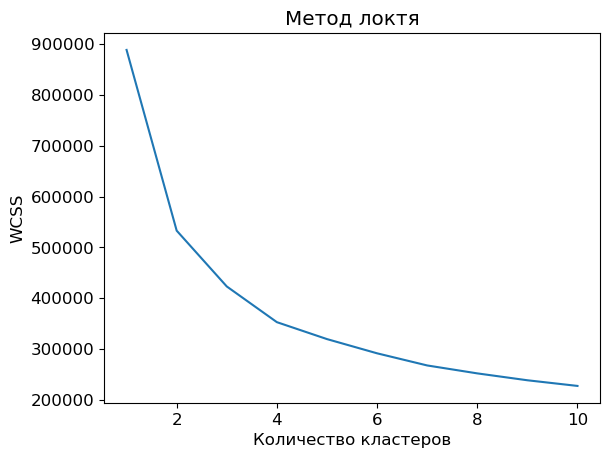

In [403]:
# при выборе количества кластеров
# Определение оптимального количества кластеров
#elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()